In [85]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
data = load_breast_cancer()
X = StandardScaler().fit_transform(data.data)
X = pd.DataFrame(X, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['target'])
y["target"].apply(lambda x: "malignant" if x == 1 else "benign")
X["target"] = y["target"]

In [87]:
X.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


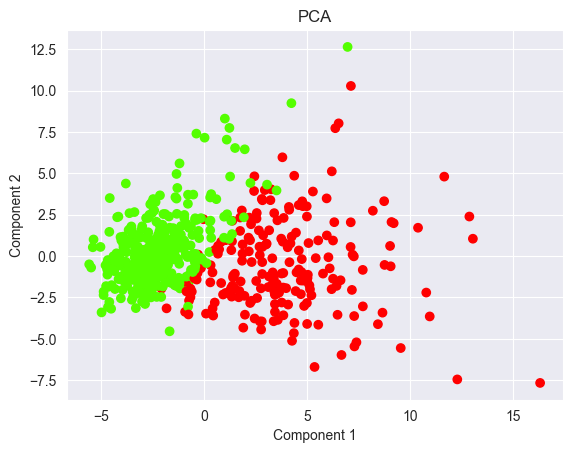

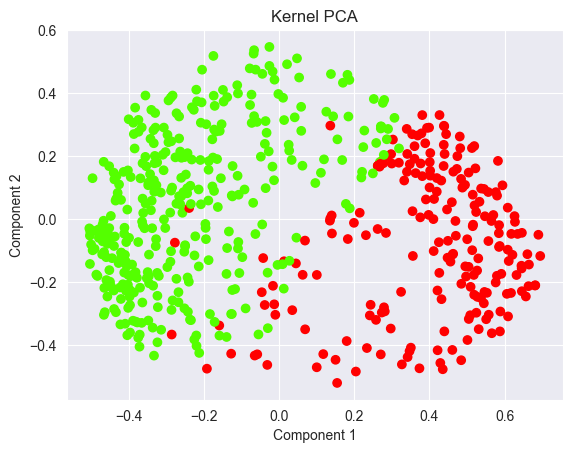

In [88]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA


def plot_pca(X,y, title="PCA"):
    plt.title(title)
    plt.scatter(X[:, 0], X[:, 1], c=y["target"])
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

kpca = KernelPCA(kernel ='rbf')
X_kpca = kpca.fit_transform(X)

plot_pca(X_pca,y)
plot_pca(X_kpca,y, title="Kernel PCA")

In [102]:
def calculate_explained_variance(X, n_components, pca = None):
    # Explained variance
    if pca is None:
        pca = PCA(n_components = n_components)
    X_pca = pca.fit_transform(X)
    explained_variance = pca.explained_variance_
    total_explained_variance = explained_variance.sum()

    # Print results
    print(f"Explained Variance:\n{explained_variance}")
    print(f"Total Explained Variance: {total_explained_variance:.4f}\n\n")

        # Normalized
    # Explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    total_explained_variance_ratio = explained_variance_ratio.sum()

    # Print results
    print(f"\nExplained Variance Ratio Normalized:\n{explained_variance_ratio}")
    print(f"Total Explained Variance Ratio Normalized: {total_explained_variance_ratio:.4f}")
    return  explained_variance_ratio

def plot_explained_variance(explained_variance_ratio):
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_variance_ratio, marker='o')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('Cumulative Explained Variance Ratio by Principal Components')

    plt.figure(figsize=(10,6))
    plt.bar(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('Cumulative Explained Variance Ratio by Principal Components')
    plt.show()

    return cumulative_variance_ratio

In [90]:
explained_variance_ratio_30 = calculate_explained_variance(X,30)

Explained Variance:
[1.34505448e+01 5.70965788e+00 2.82936256e+00 1.98801526e+00
 1.65396892e+00 1.20951382e+00 6.77969851e-01 4.78543277e-01
 4.17628784e-01 3.51323786e-01 2.94501924e-01 2.61648147e-01
 2.44822883e-01 1.59745586e-01 1.00418434e-01 8.00056564e-02
 6.49002454e-02 5.81177953e-02 5.07421427e-02 4.40638844e-02
 3.05954434e-02 2.90541627e-02 2.72758927e-02 2.42849817e-02
 1.73915781e-02 1.54972274e-02 8.05372819e-03 6.87786020e-03
 1.59124334e-03 7.42907144e-04]
Total Explained Variance: 30.2869



Explained Variance Ratio Normalized:
[4.44103003e-01 1.88518477e-01 9.34184030e-02 6.56392408e-02
 5.46098748e-02 3.99350902e-02 2.23848515e-02 1.58002899e-02
 1.37890472e-02 1.15998237e-02 9.72370944e-03 8.63896071e-03
 8.08343302e-03 5.27439563e-03 3.31556296e-03 2.64158463e-03
 2.14284212e-03 1.91890276e-03 1.67537734e-03 1.45487813e-03
 1.01018424e-03 9.59295041e-04 9.00581059e-04 8.01828737e-04
 5.74225968e-04 5.11679293e-04 2.65913756e-04 2.27089566e-04
 5.25388344e-05 2.45

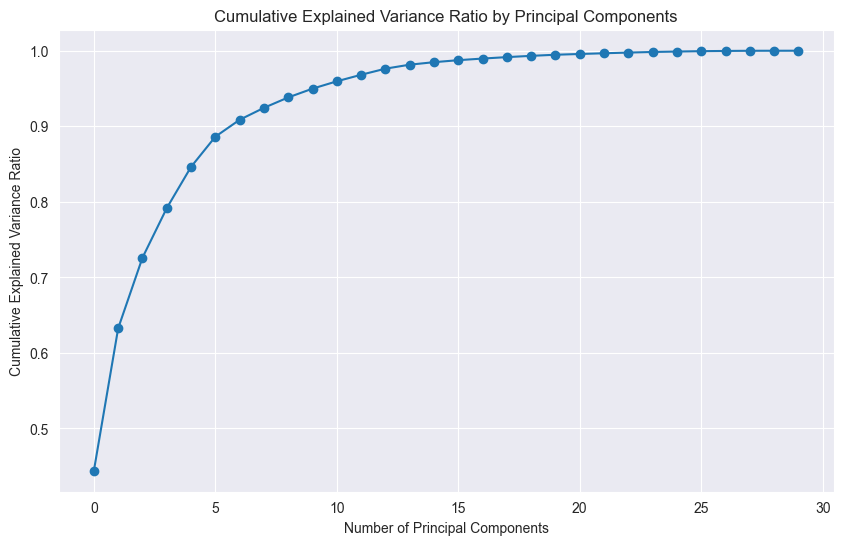

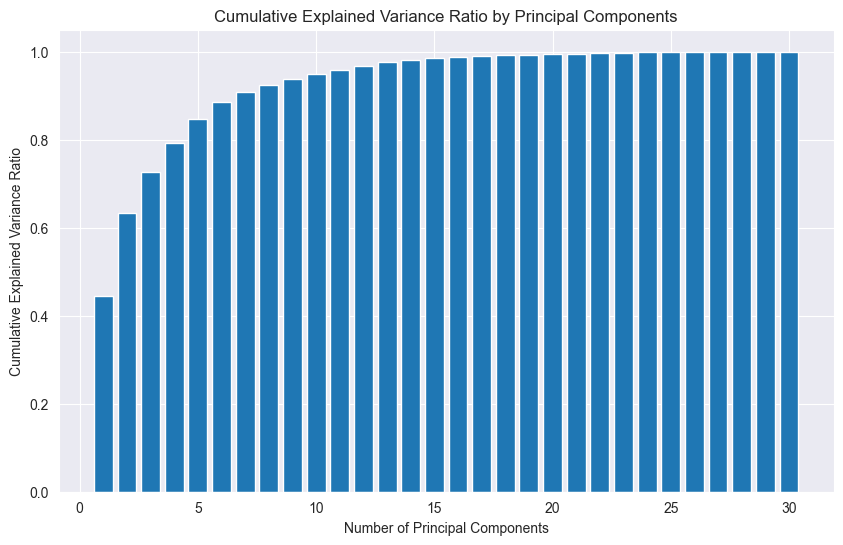

In [91]:
cumulative_variance_ratio_30 = plot_explained_variance(explained_variance_ratio_30)

In [92]:
cumulative_variance_ratio_30[1]

np.float64(0.6326214797196601)

|As we can observe, when we increase number of components in PCA we cumulate higher amount of variance so we know more about data. That is a tradeoff between number of features and the knowledge(variance) about data. For 2 features we obtained 63% of total variance.

In [93]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
estimator = SVC(kernel="linear")
selector = RFE(estimator, n_features_to_select=15, step=1)
selector = selector.fit(X, y.target.values)
print(selector.support_)
print(selector.ranking_)

[ True False  True False False  True False  True  True False False False
  True  True False False False  True False  True  True  True  True  True
 False False False False False  True  True]
[ 1  7  1  9  6  1  8  1  1 14  5 15  1  1  4 11 10  1  3  1  1  1  1  1
 16 17 12 13  2  1  1]


In [94]:
top_15_features = X.columns[selector.support_]
bot_15_features = X.columns[~selector.support_]

In [95]:
explained_variance_ratio_top_15 = calculate_explained_variance(X[top_15_features],15)


Explained Variance:
[8.06704528e+00 2.60958100e+00 1.11926543e+00 7.39965842e-01
 6.39968503e-01 4.69838539e-01 2.45518805e-01 1.36029755e-01
 7.60309723e-02 5.99961062e-02 5.16449196e-02 3.46990432e-02
 5.79755035e-03 3.27525546e-03 1.67478982e-04]
Total Explained Variance: 14.2588



Explained Variance Ratio Normalized:
[5.65758088e-01 1.83015157e-01 7.84963327e-02 5.18952907e-02
 4.48822765e-02 3.29507205e-02 1.72187269e-02 9.54003991e-03
 5.33220480e-03 4.20764743e-03 3.62196194e-03 2.43351359e-03
 4.06593850e-04 2.29700244e-04 1.17456374e-05]
Total Explained Variance Ratio Normalized: 1.0000


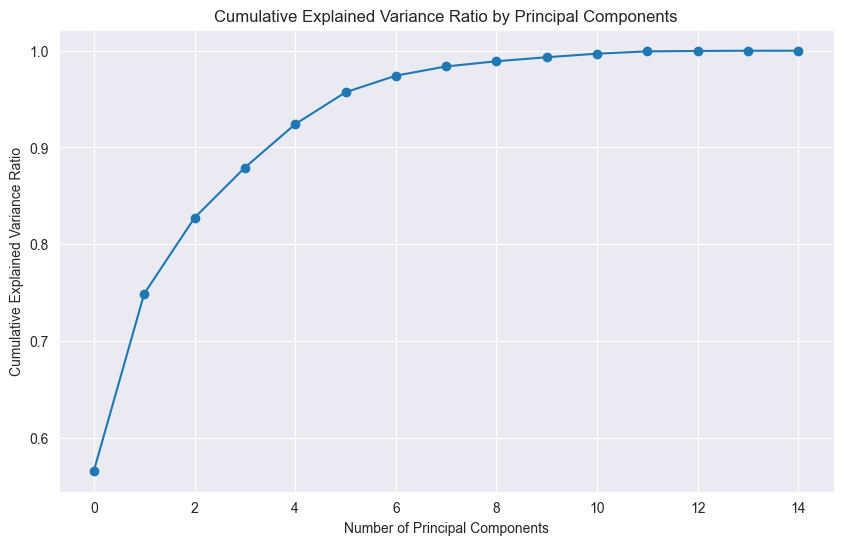

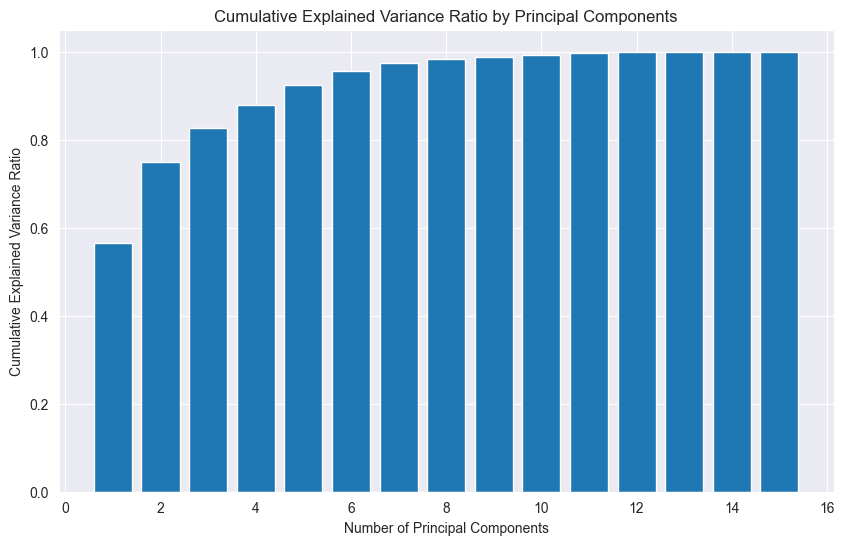

In [96]:
cumulative_variance_ratio_top_15 = plot_explained_variance(explained_variance_ratio_top_15)

In [97]:
explained_variance_ratio_bot_15 = calculate_explained_variance(X[bot_15_features],15)


Explained Variance:
[6.48300229 2.56061685 2.01145225 1.26837235 1.03460629 0.97226981
 0.44805055 0.32764125 0.26710222 0.19162096 0.14724007 0.10770947
 0.0799149  0.06909422 0.03729815]
Total Explained Variance: 16.0060



Explained Variance Ratio Normalized:
[0.40447554 0.15975729 0.12549482 0.07913395 0.06454925 0.06066007
 0.02795394 0.02044159 0.01666455 0.01195526 0.00918633 0.00672001
 0.0049859  0.0043108  0.00232704]
Total Explained Variance Ratio Normalized: 0.9986


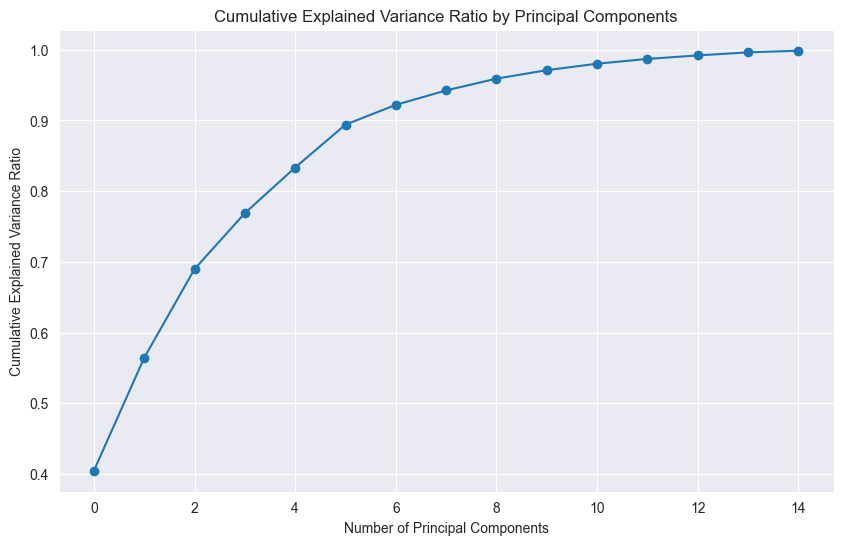

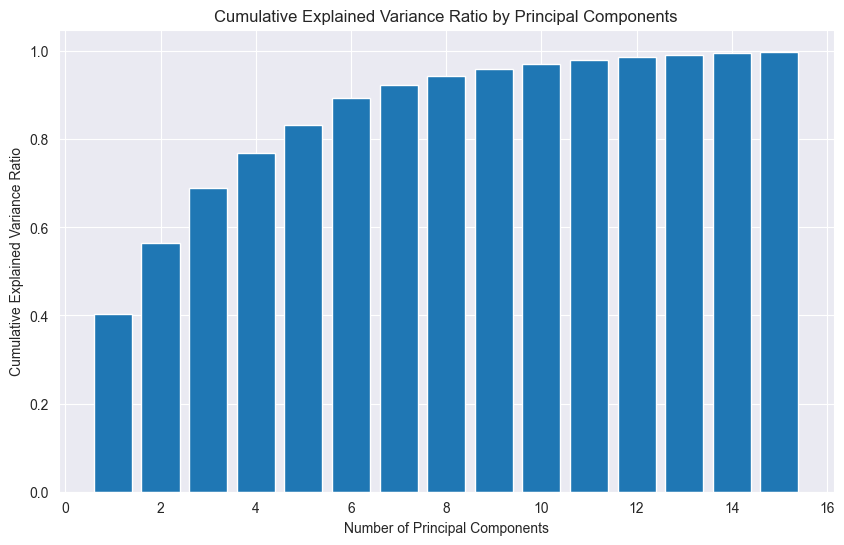

In [98]:
cumulative_variance_ratio_bot_15 = plot_explained_variance(explained_variance_ratio_bot_15)


Total variance for top 15 features is 14.2588, for bot 15 features is 16.0060 which sums to total variance of 30 features which is 30.2869. What is weird for me is that, variance for top 15 features is lower than variance for bot 15 features. I thought that it should have been opposite.

# Kernel PCA

In [3]:
from sklearn.datasets import make_moons

def plot_pca(X,y, title="PCA"):
    plt.title(title)
    plt.scatter(X[:, 0], X[:, 1], c = y)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()

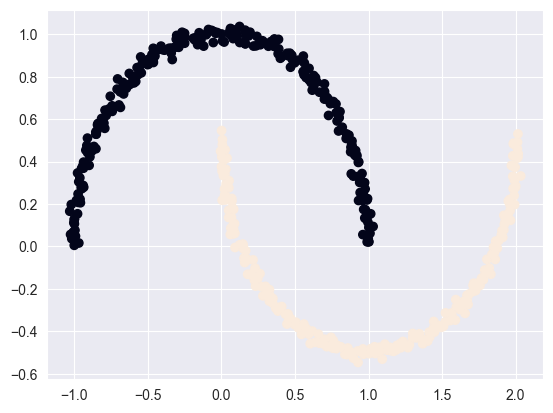

In [4]:
X, y = make_moons(n_samples = 500, noise = 0.02, random_state = 417)
df = pd.DataFrame(X, columns = ['x1', 'x2'])
df['y'] = y
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

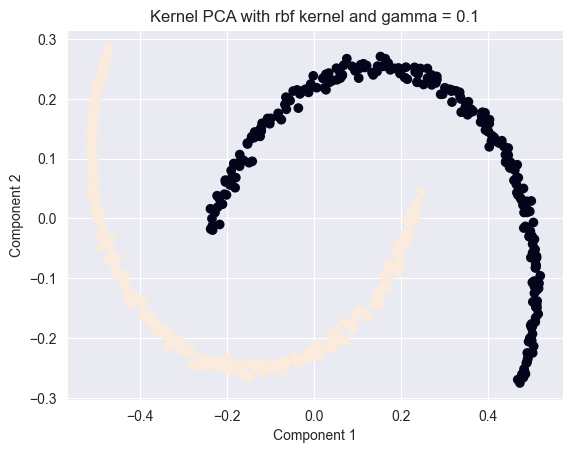

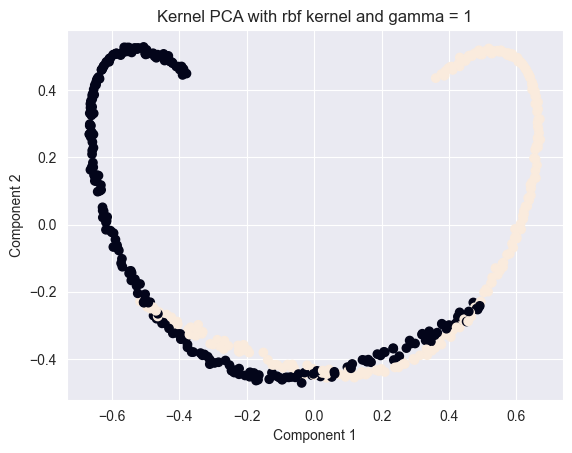

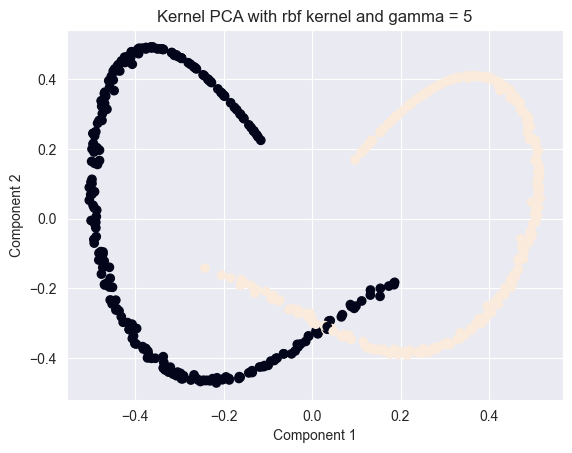

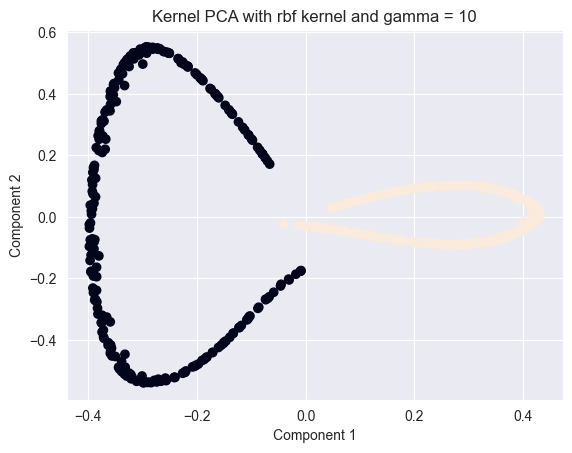

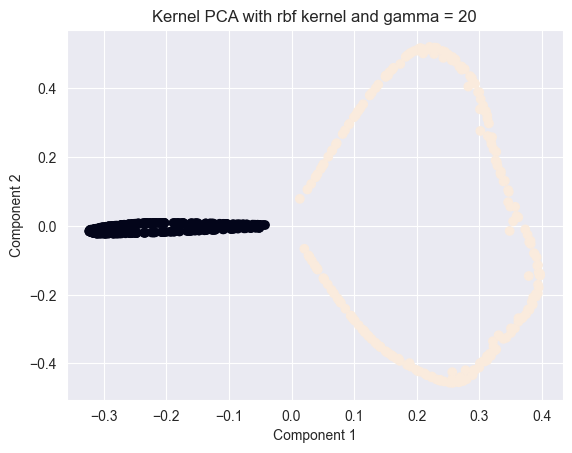

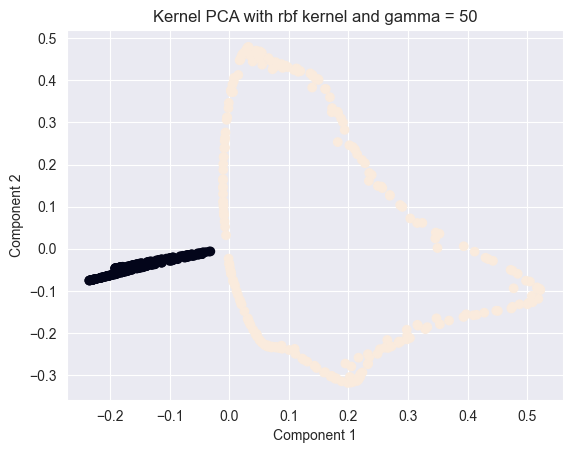

In [5]:
from sklearn.decomposition import KernelPCA

gamma_lst = [0.1, 1,5, 10,20, 50]
for gamma in gamma_lst:
    kpca = KernelPCA(kernel ='rbf', gamma = gamma)
    X_kpca = kpca.fit_transform(X)
    plot_pca(X_kpca,y, title=f"Kernel PCA with rbf kernel and gamma = {gamma}")

For rbf kernel,for gamma bigger than 10 data starts to be linearly separable

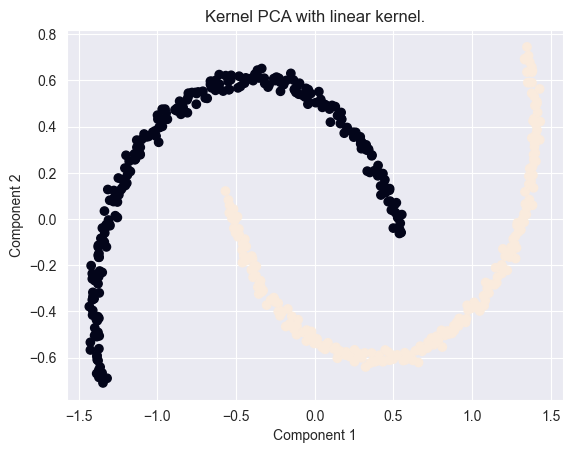

In [12]:

kpca = KernelPCA(kernel ='linear',)
X_kpca = kpca.fit_transform(X)
plot_pca(X_kpca,y, title=f"Kernel PCA with linear kernel.")

For linear kernel there is no usefull transformation

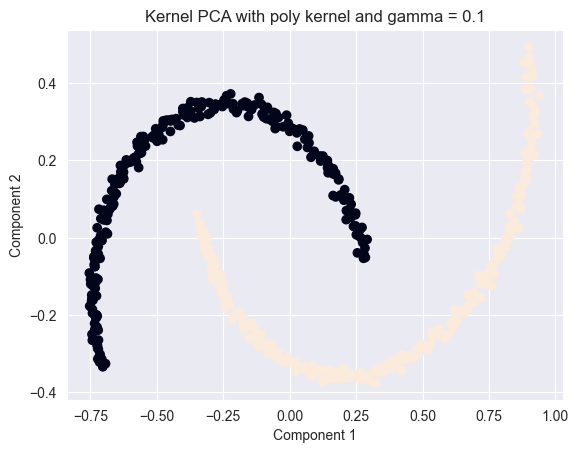

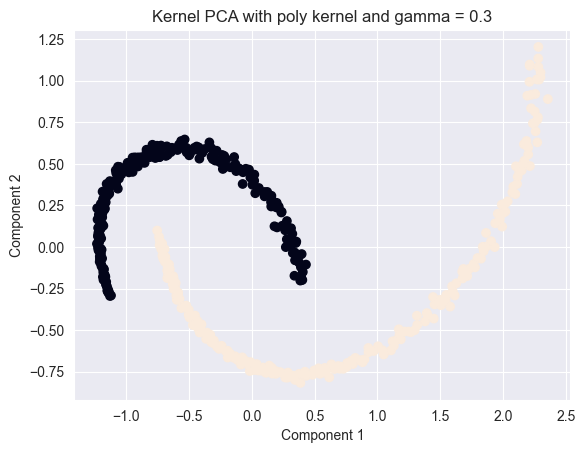

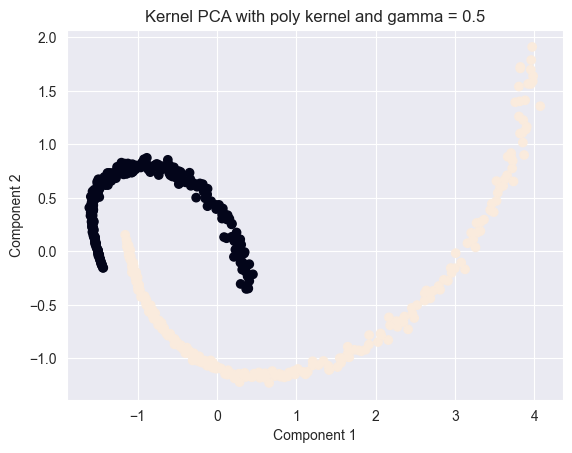

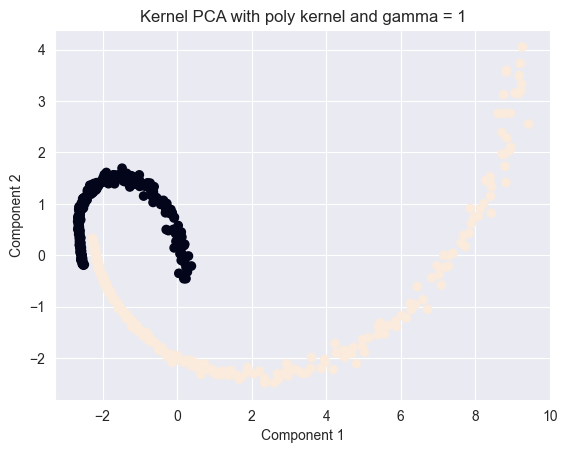

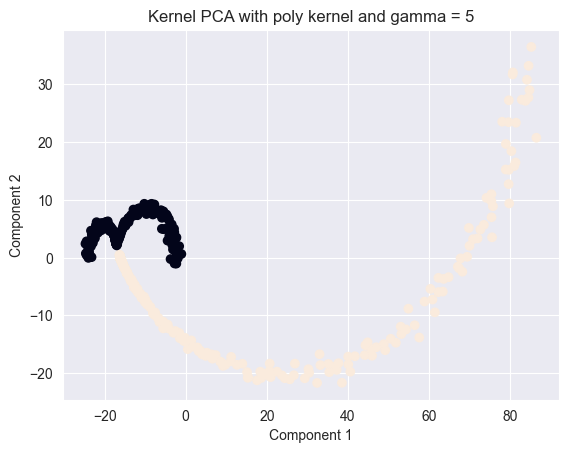

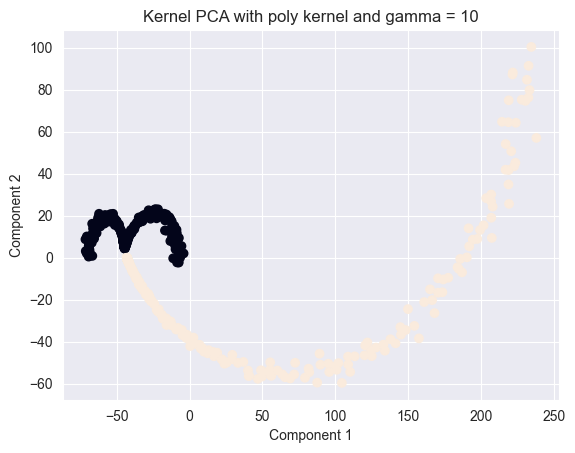

In [14]:
gamma_lst = [0.1, 0.3, 0.5, 1,5, 10]
for gamma in gamma_lst:
    kpca = KernelPCA(kernel ='poly', gamma = gamma)
    X_kpca = kpca.fit_transform(X)
    plot_pca(X_kpca,y, title=f"Kernel PCA with poly kernel and gamma = {gamma}")

Poly kernel transform data, but not as good as rbf kernel

In [20]:
gamma_lst = [0.1, 0.3, 0.5, 1,5, 10]
for gamma in gamma_lst:
    kpca = KernelPCA(kernel ='sigmoid', gamma = gamma)
    X_kpca = kpca.fit_transform(X)
    plot_pca(X_kpca,y, title=f"Kernel PCA with sigmoid kernel and gamma = {gamma}")

ValueError: There are significant negative eigenvalues (0.0623193 of the maximum positive). Either the matrix is not PSD, or there was an issue while computing the eigendecomposition of the matrix.

Sigmoid kernel don't work for that data

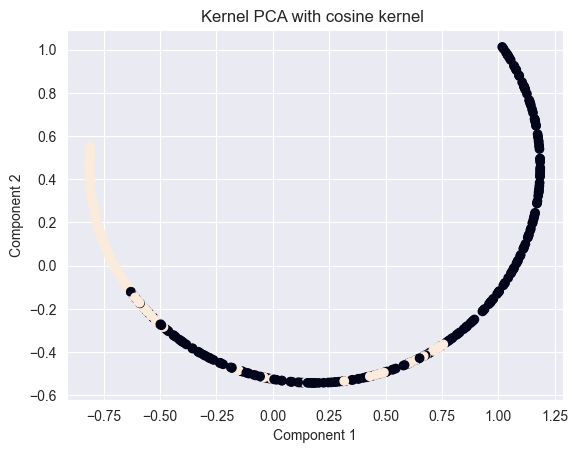

In [29]:


kpca = KernelPCA(kernel ='cosine')
X_kpca = kpca.fit_transform(X)
plot_pca(X_kpca,y, title=f"Kernel PCA with cosine kernel ")

Cosine kernel couldn't separate data better than rbf kernel


 # Classic PCA Analysis on MNIST

In [66]:
from sklearn.datasets import fetch_openml

# Load MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
# Normalization
X = X / 256
y = y.astype(int)
# Print shapes
print('Data Shape:', X.shape)
print('Labels Shape:', y.shape)


Data Shape: (70000, 784)
Labels Shape: (70000,)


In [67]:
def visualize_mnist(X, y=None, indices=None, num_images=10, random=True,
                    reshape=True, figsize=(15, 3)):

    # If indices not provided, create them
    if indices is None:
        if random:
            indices = np.random.choice(len(X), num_images, replace=False)
        else:
            indices = np.arange(num_images)

    # Create figure
    fig, axes = plt.subplots(1, len(indices), figsize=figsize)

    # Make axes iterable if only one image
    if len(indices) == 1:
        axes = [axes]

    for i, idx in enumerate(indices):
        img = X[idx]

        # Reshape if necessary
        if reshape and img.shape[0] == 784:
            img = img.reshape(28, 28)

        # Display image
        axes[i].imshow(img, cmap='gray')
        axes[i].axis('off')

        # Add label if provided
        if y is not None:
            axes[i].set_title(f'Label: {y[idx]}', fontsize=30)

    plt.tight_layout()
    plt.show()



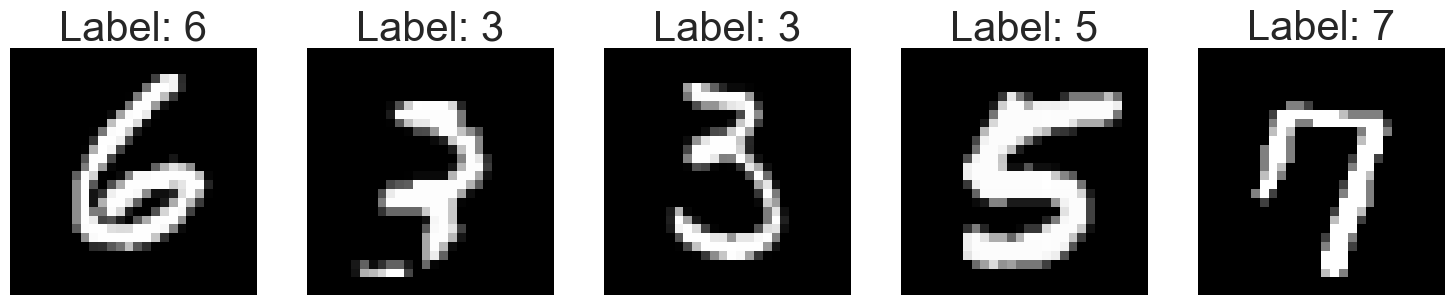

In [68]:
visualize_mnist(X,y, num_images=5)

In [79]:
def plot_2d_mnist_scatter(X, y, title):
    fig, plot = plt.subplots()
    fig.set_size_inches(16, 16)
    plt.prism()
    for i in range(10):
        digit_indeces = np.where(y == i)
        dim1 = X[digit_indeces,0]
        dim2 = X[digit_indeces,1]
        plot.scatter(dim1, dim2, label=f"Digit: {i}", s=50)


    plot.set_xticks(())
    plot.set_yticks(())

    plt.tight_layout()
    plt.legend(fontsize=20)
    plt.title(title, fontsize=40)
    plt.show()

In [80]:
#Limitted dataset for faster calculation
SAMPLES_LIMIT = 2000
X_small = X[:SAMPLES_LIMIT]
y_small = y[:SAMPLES_LIMIT]

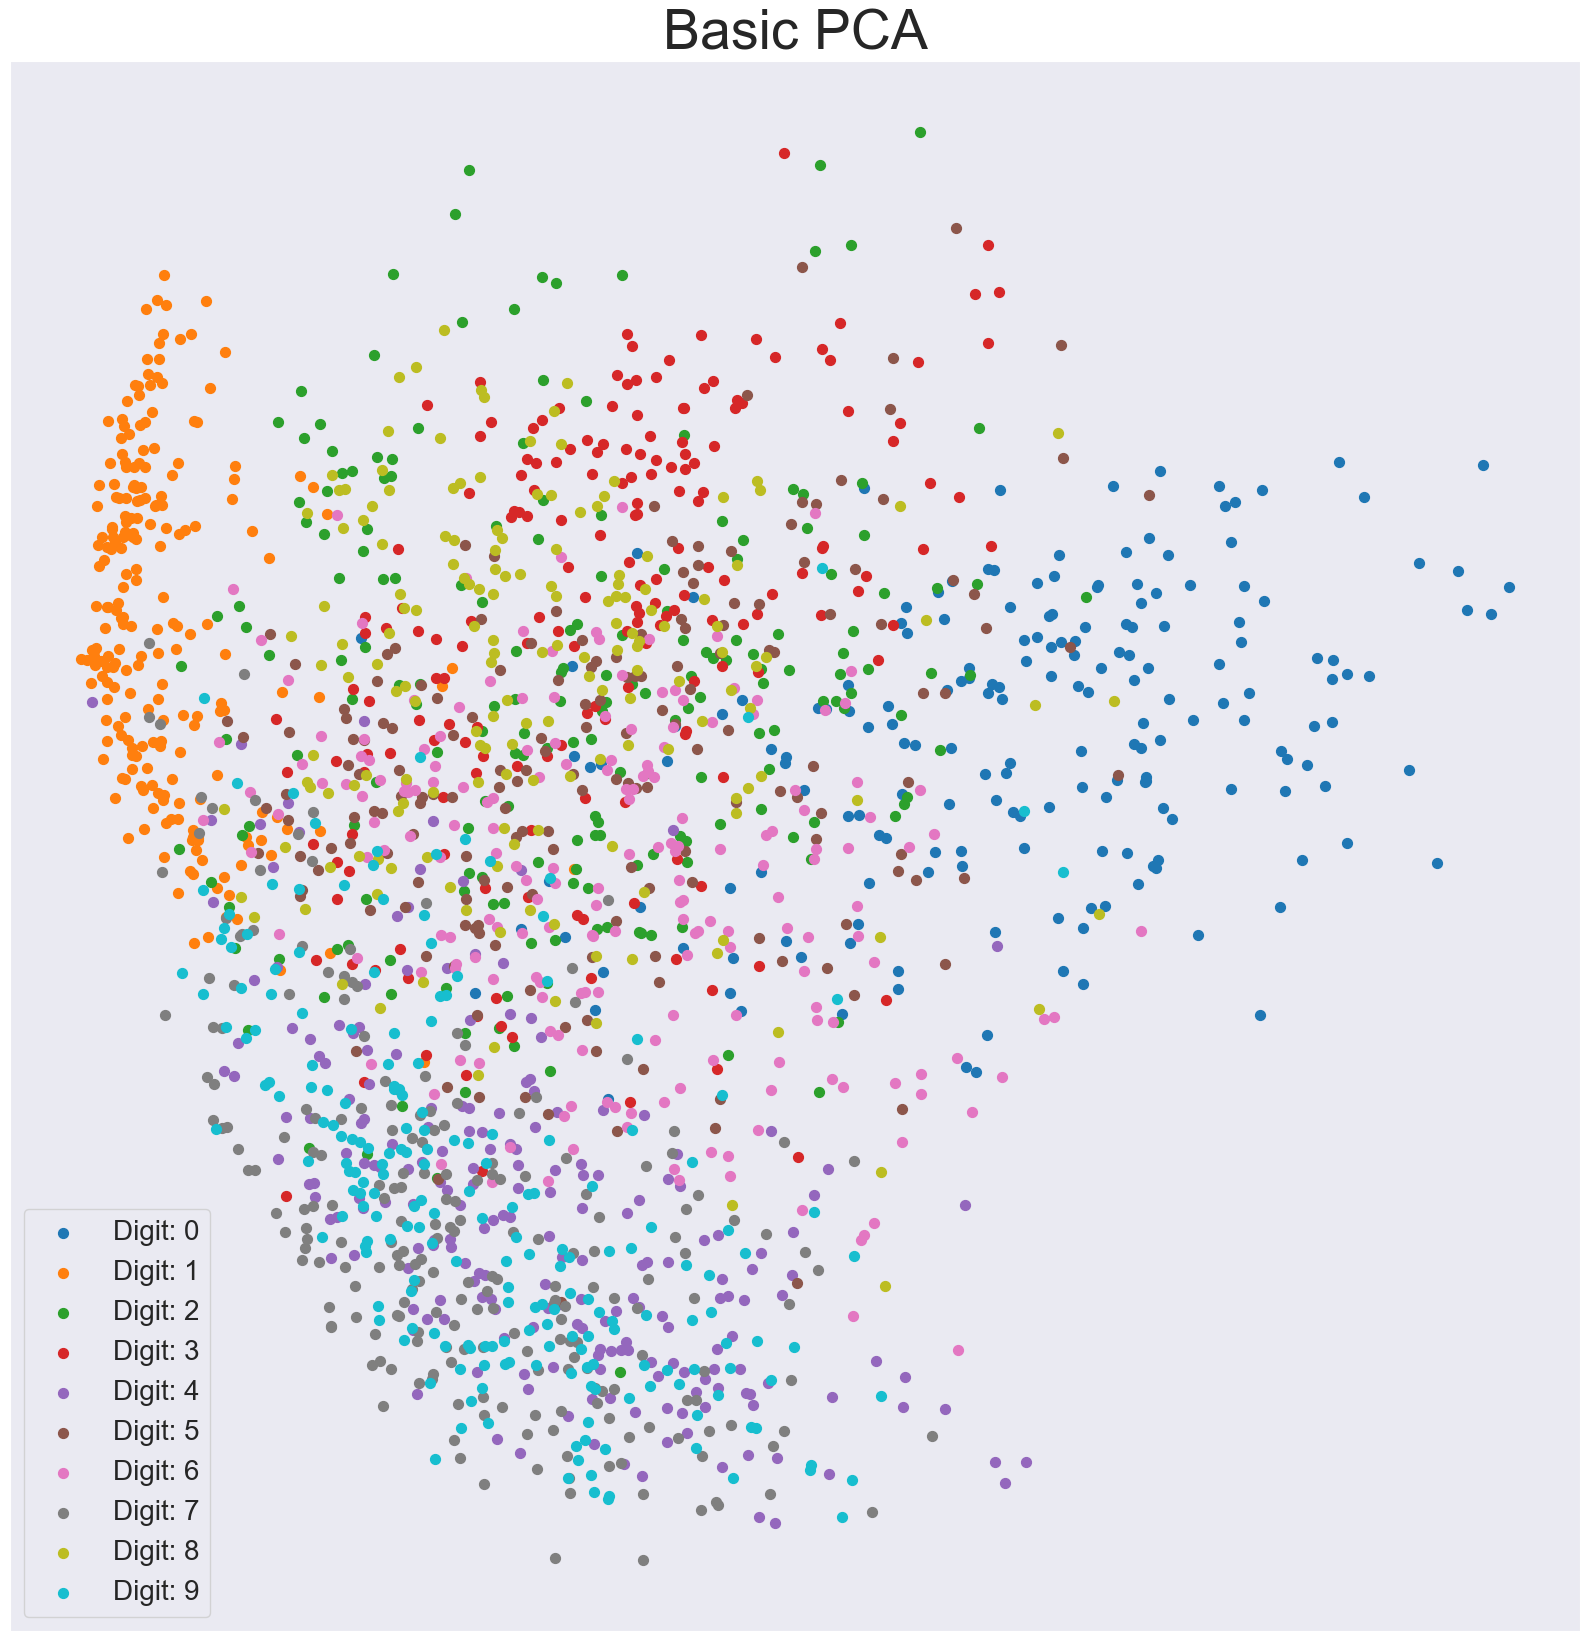

In [81]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_embedded = pca.fit_transform(X_small)
plot_2d_mnist_scatter(X_pca_embedded, y_small, title="Basic PCA")


Basic PCA struggle to properly separate digit with 2 components. In other subject, we compare t-sne and pca, and t-sne gave better results.

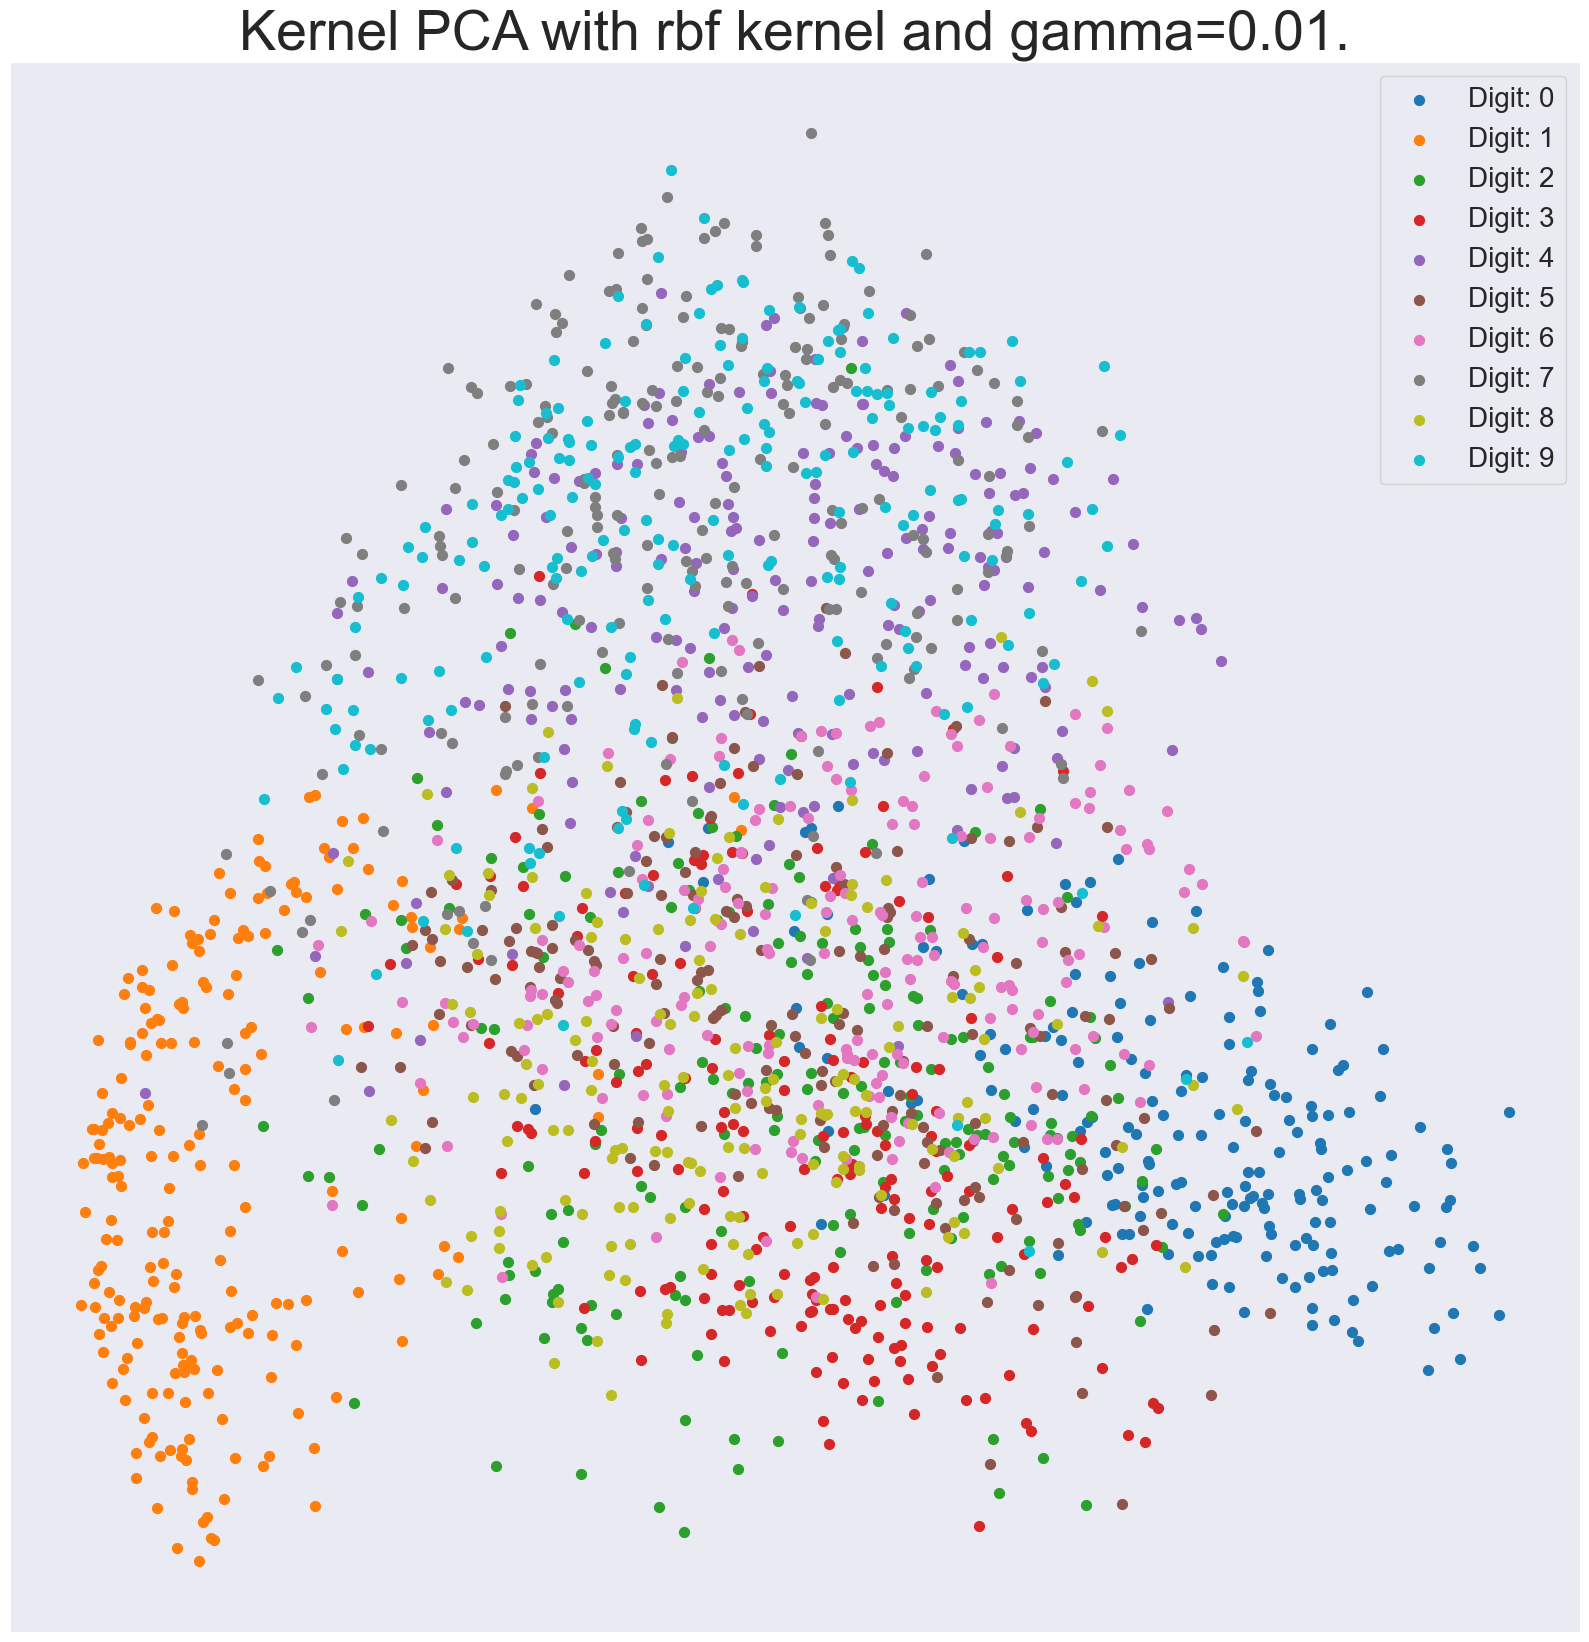

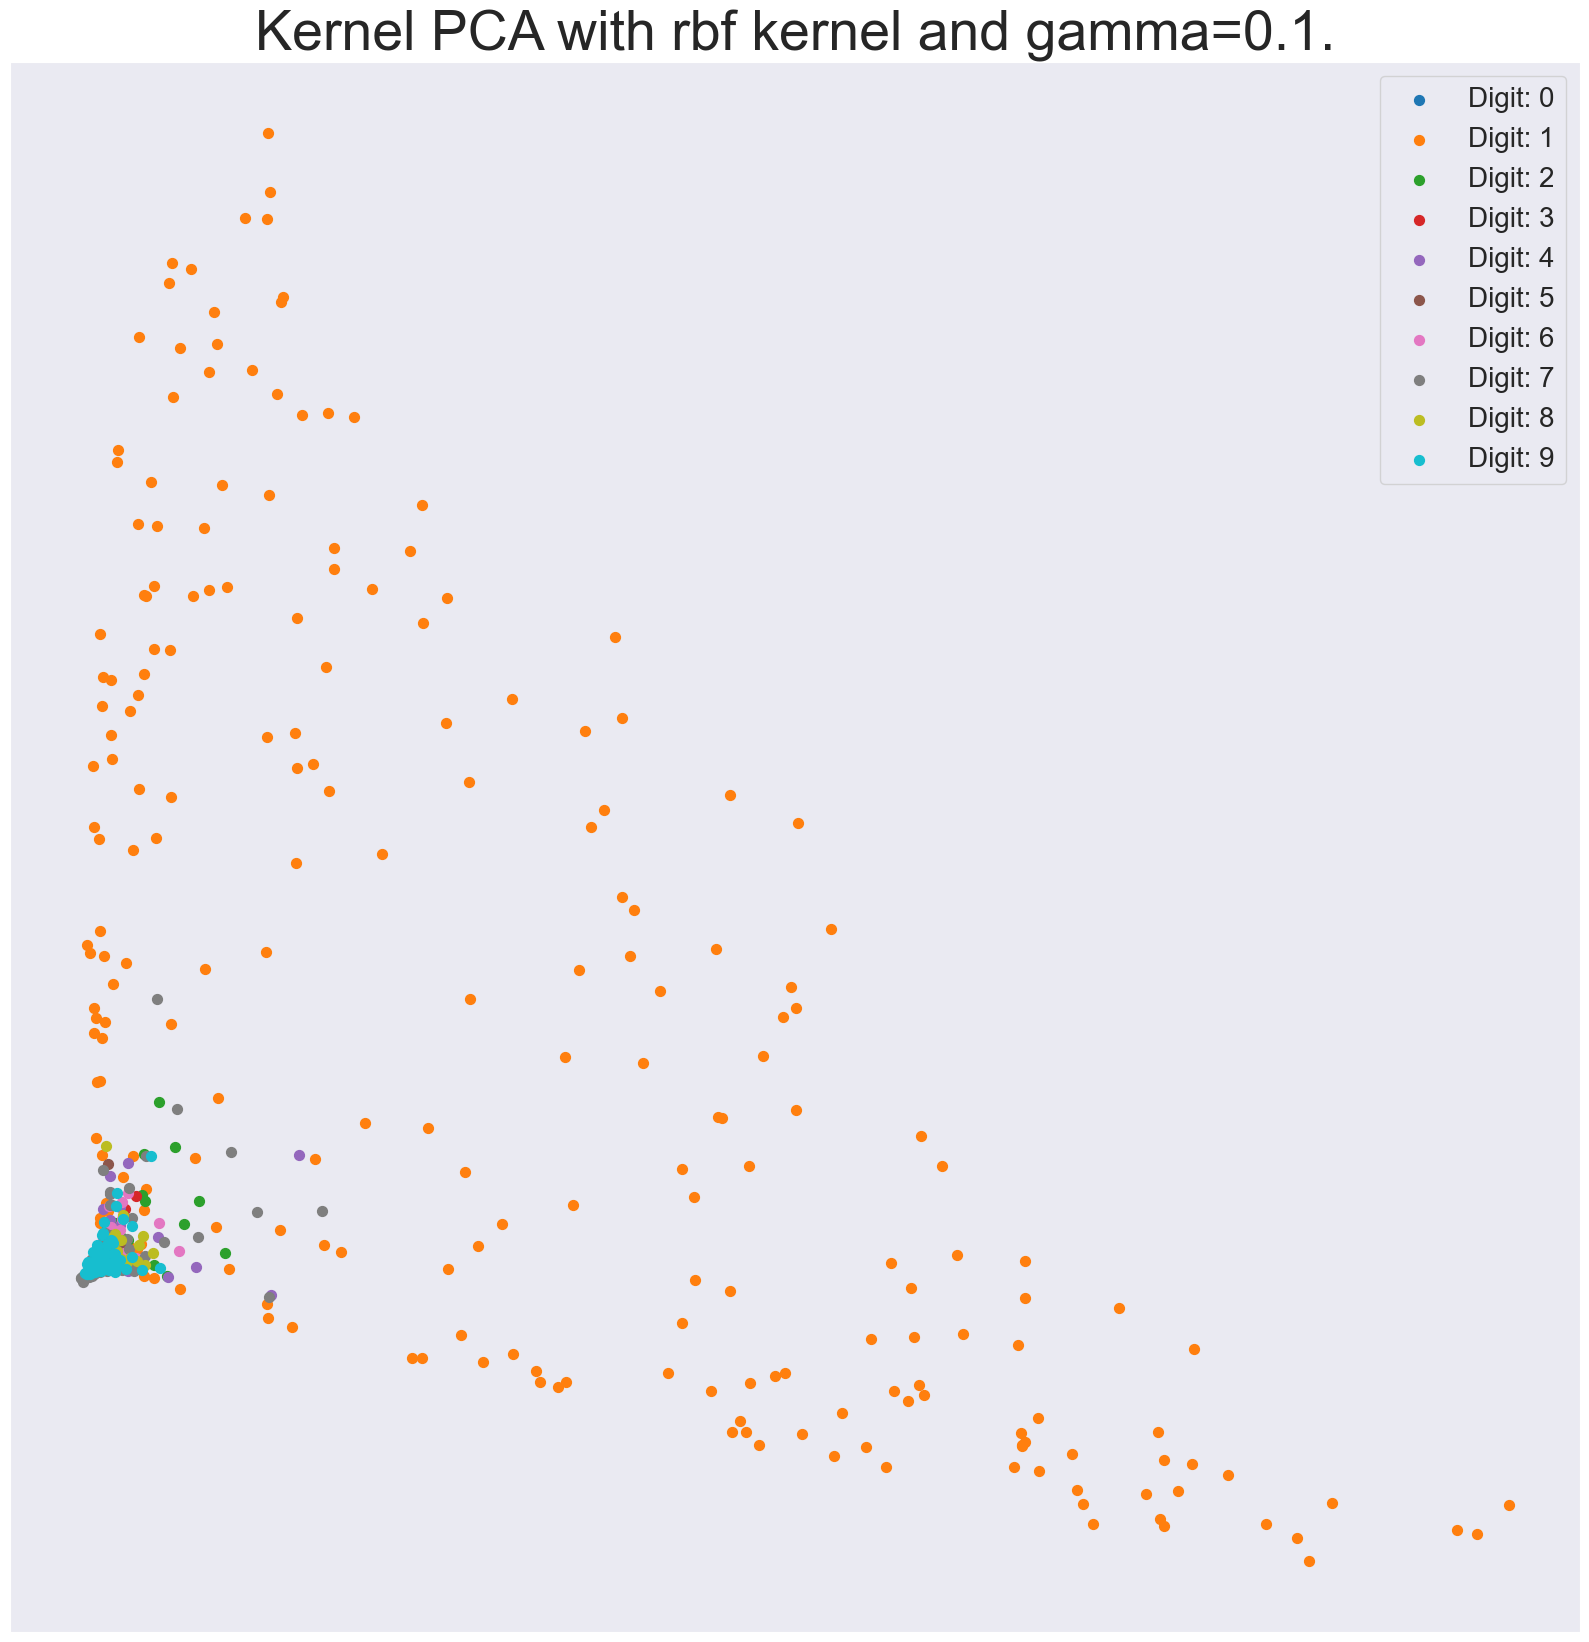

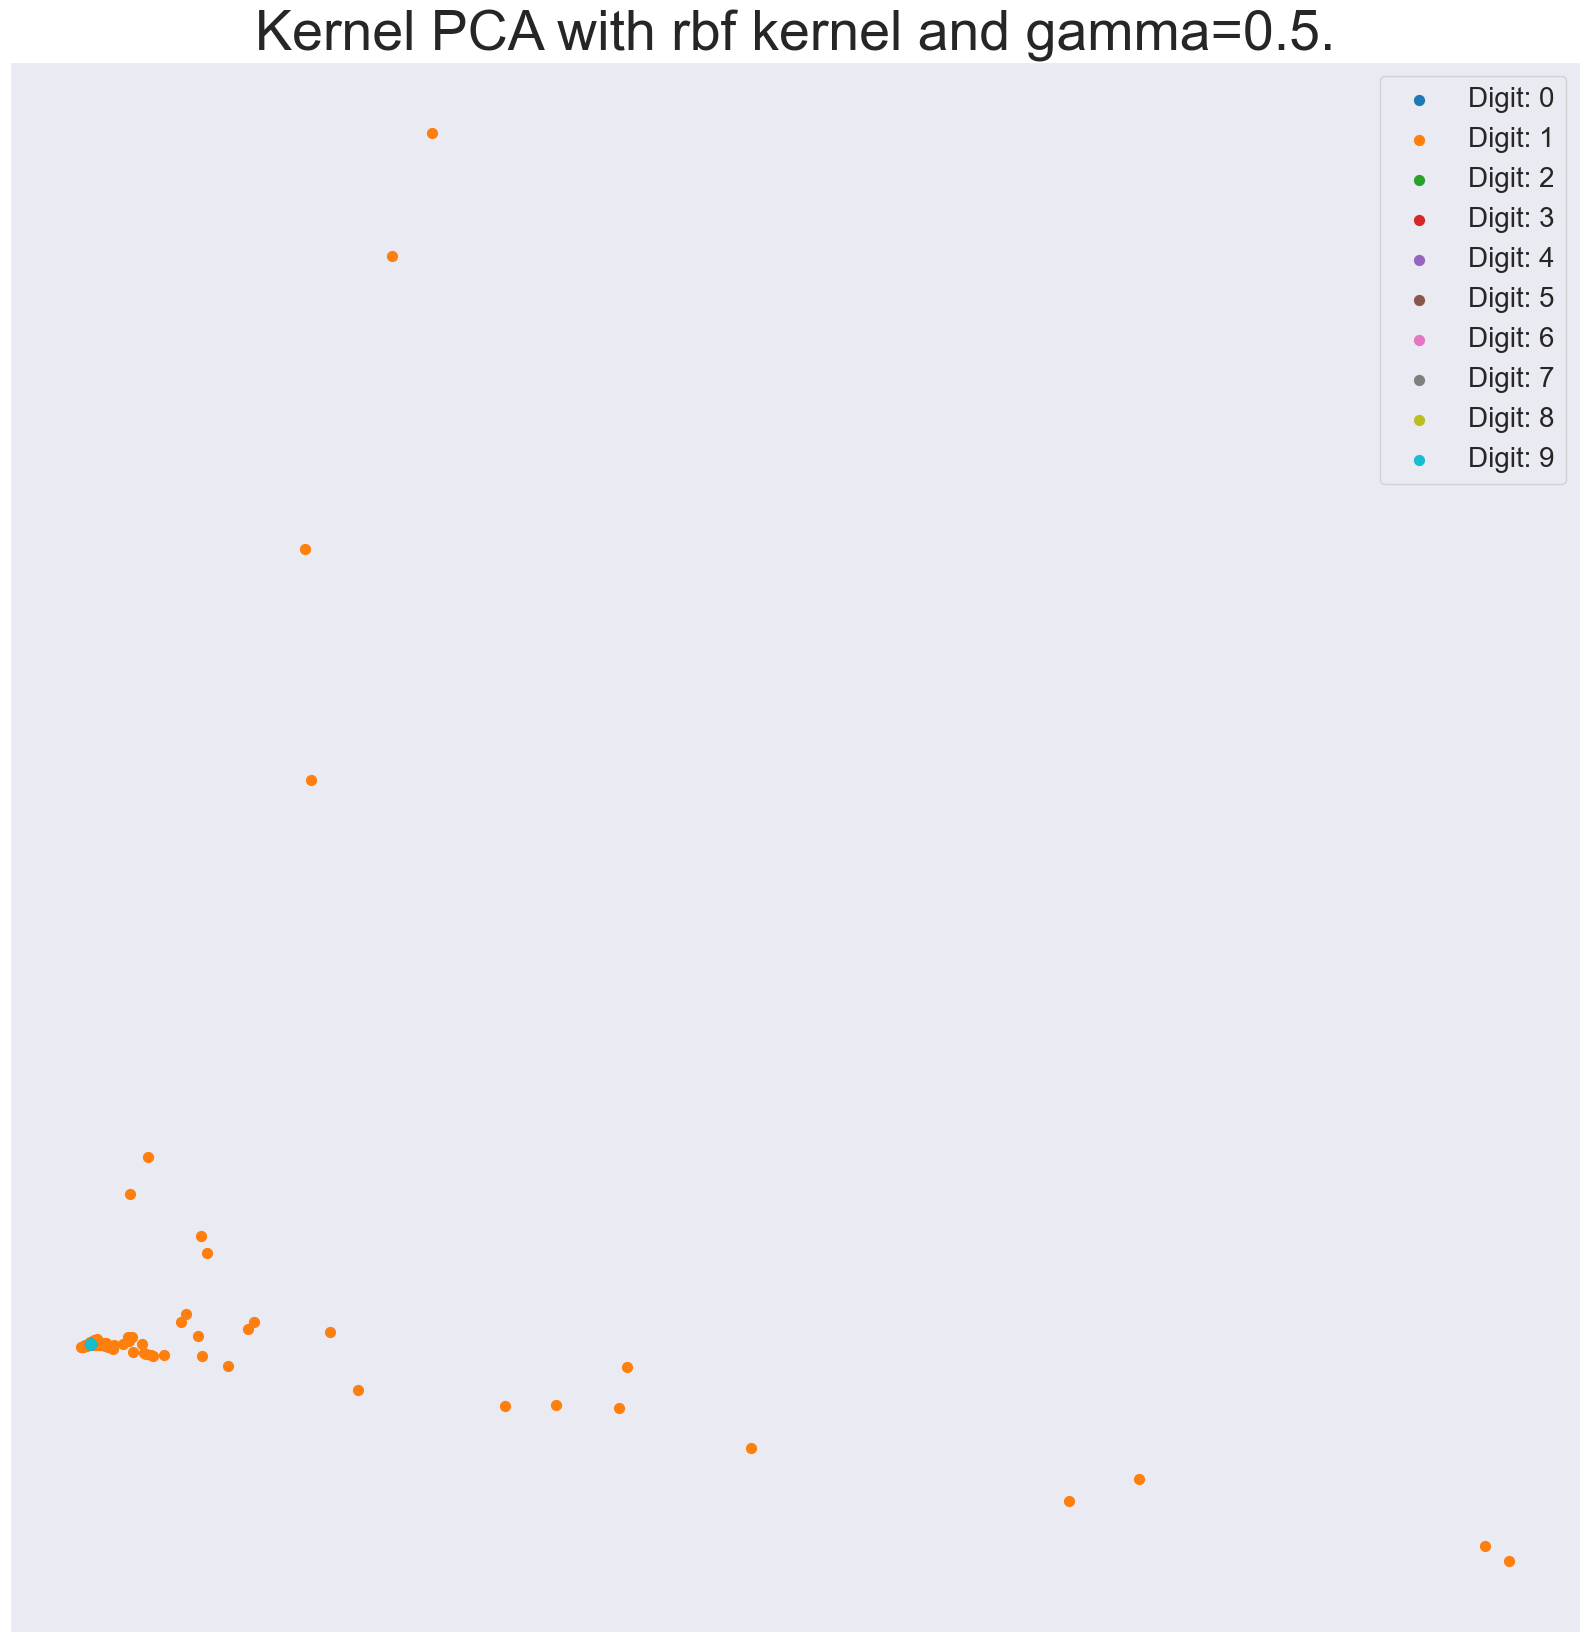

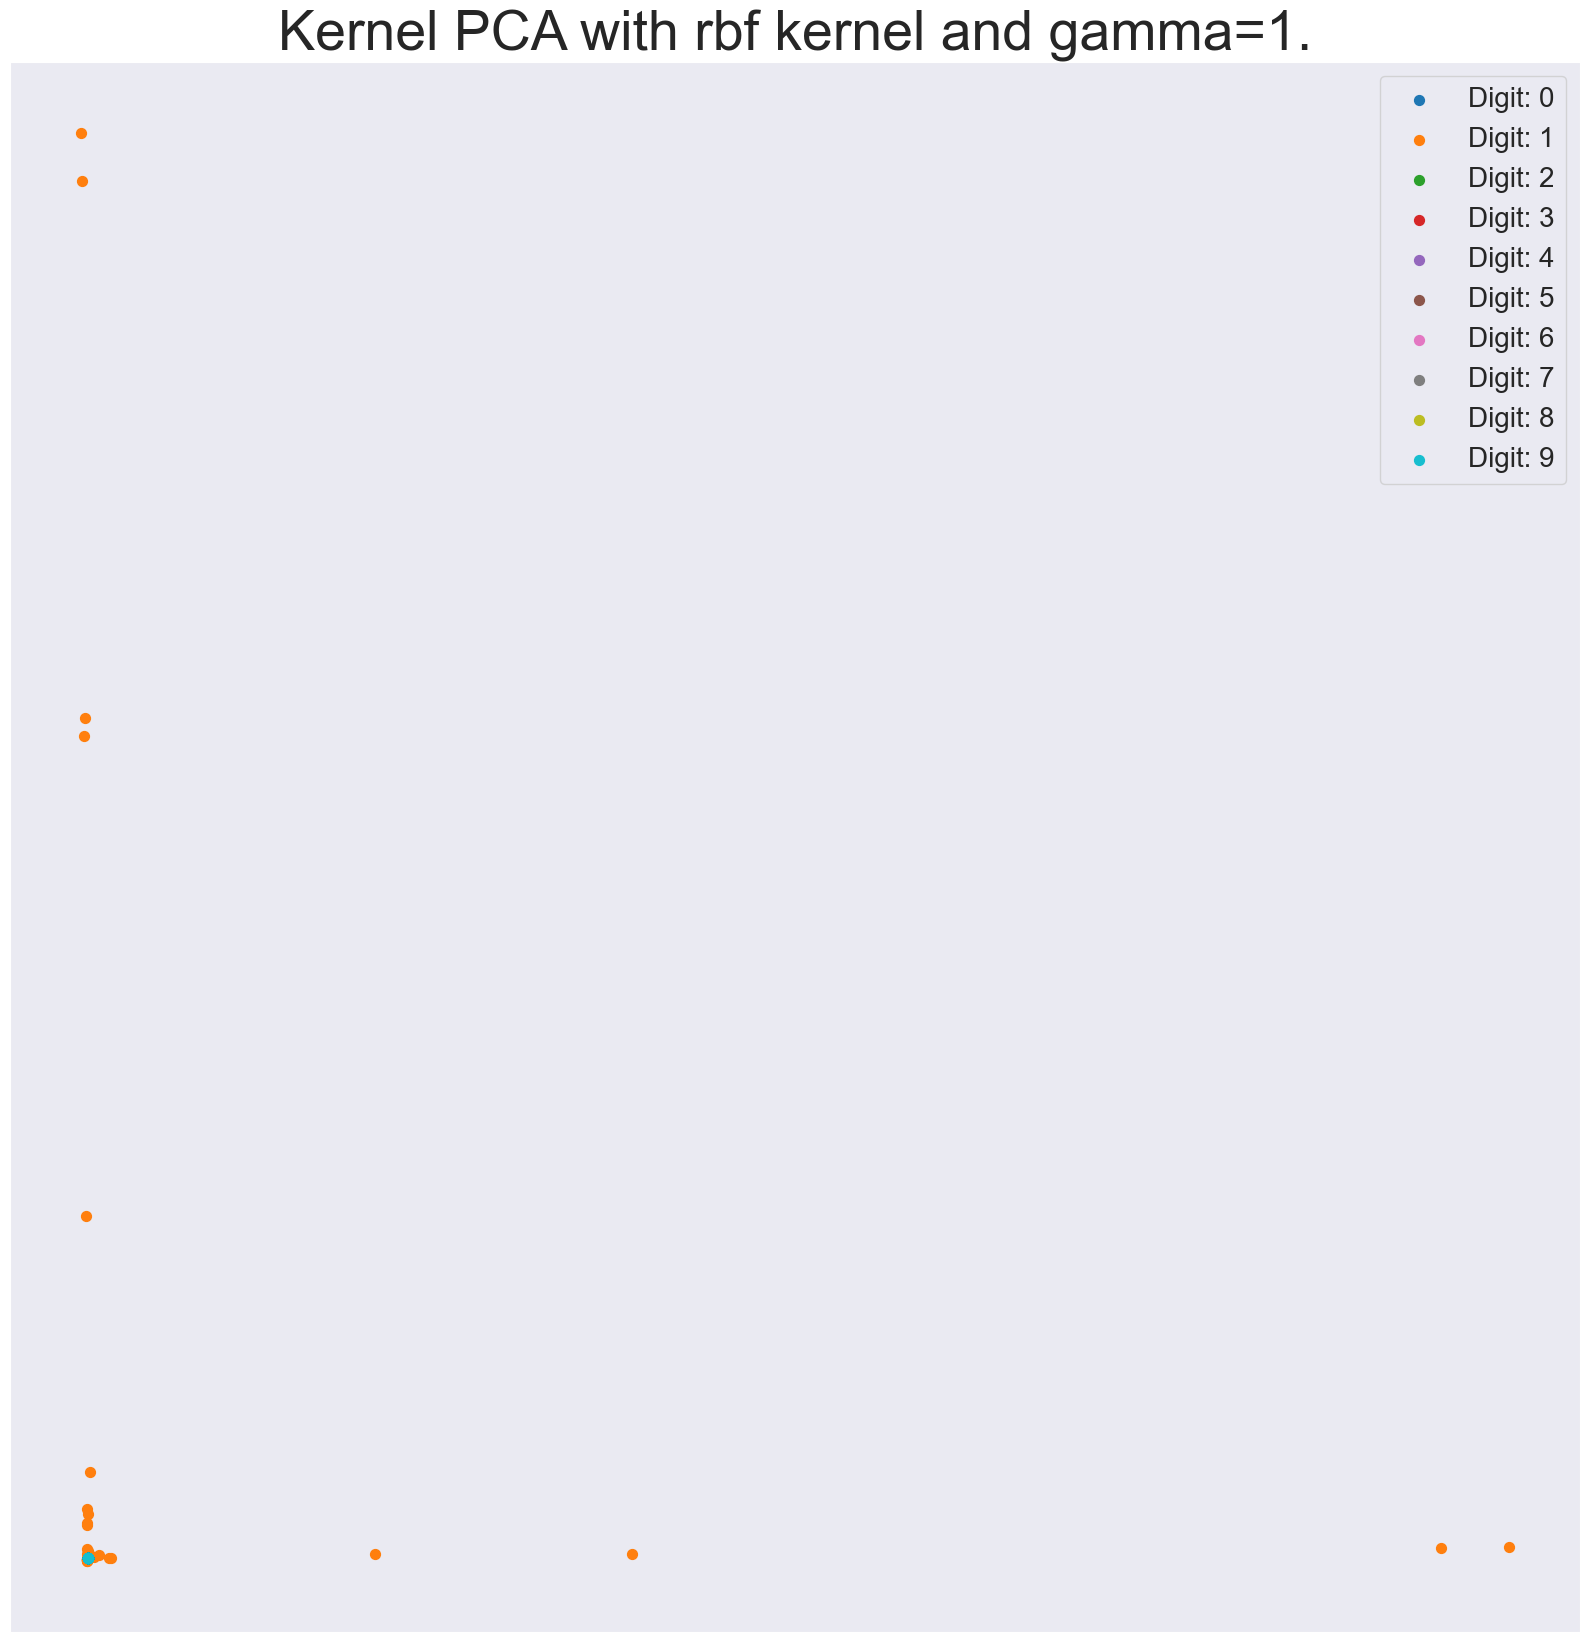

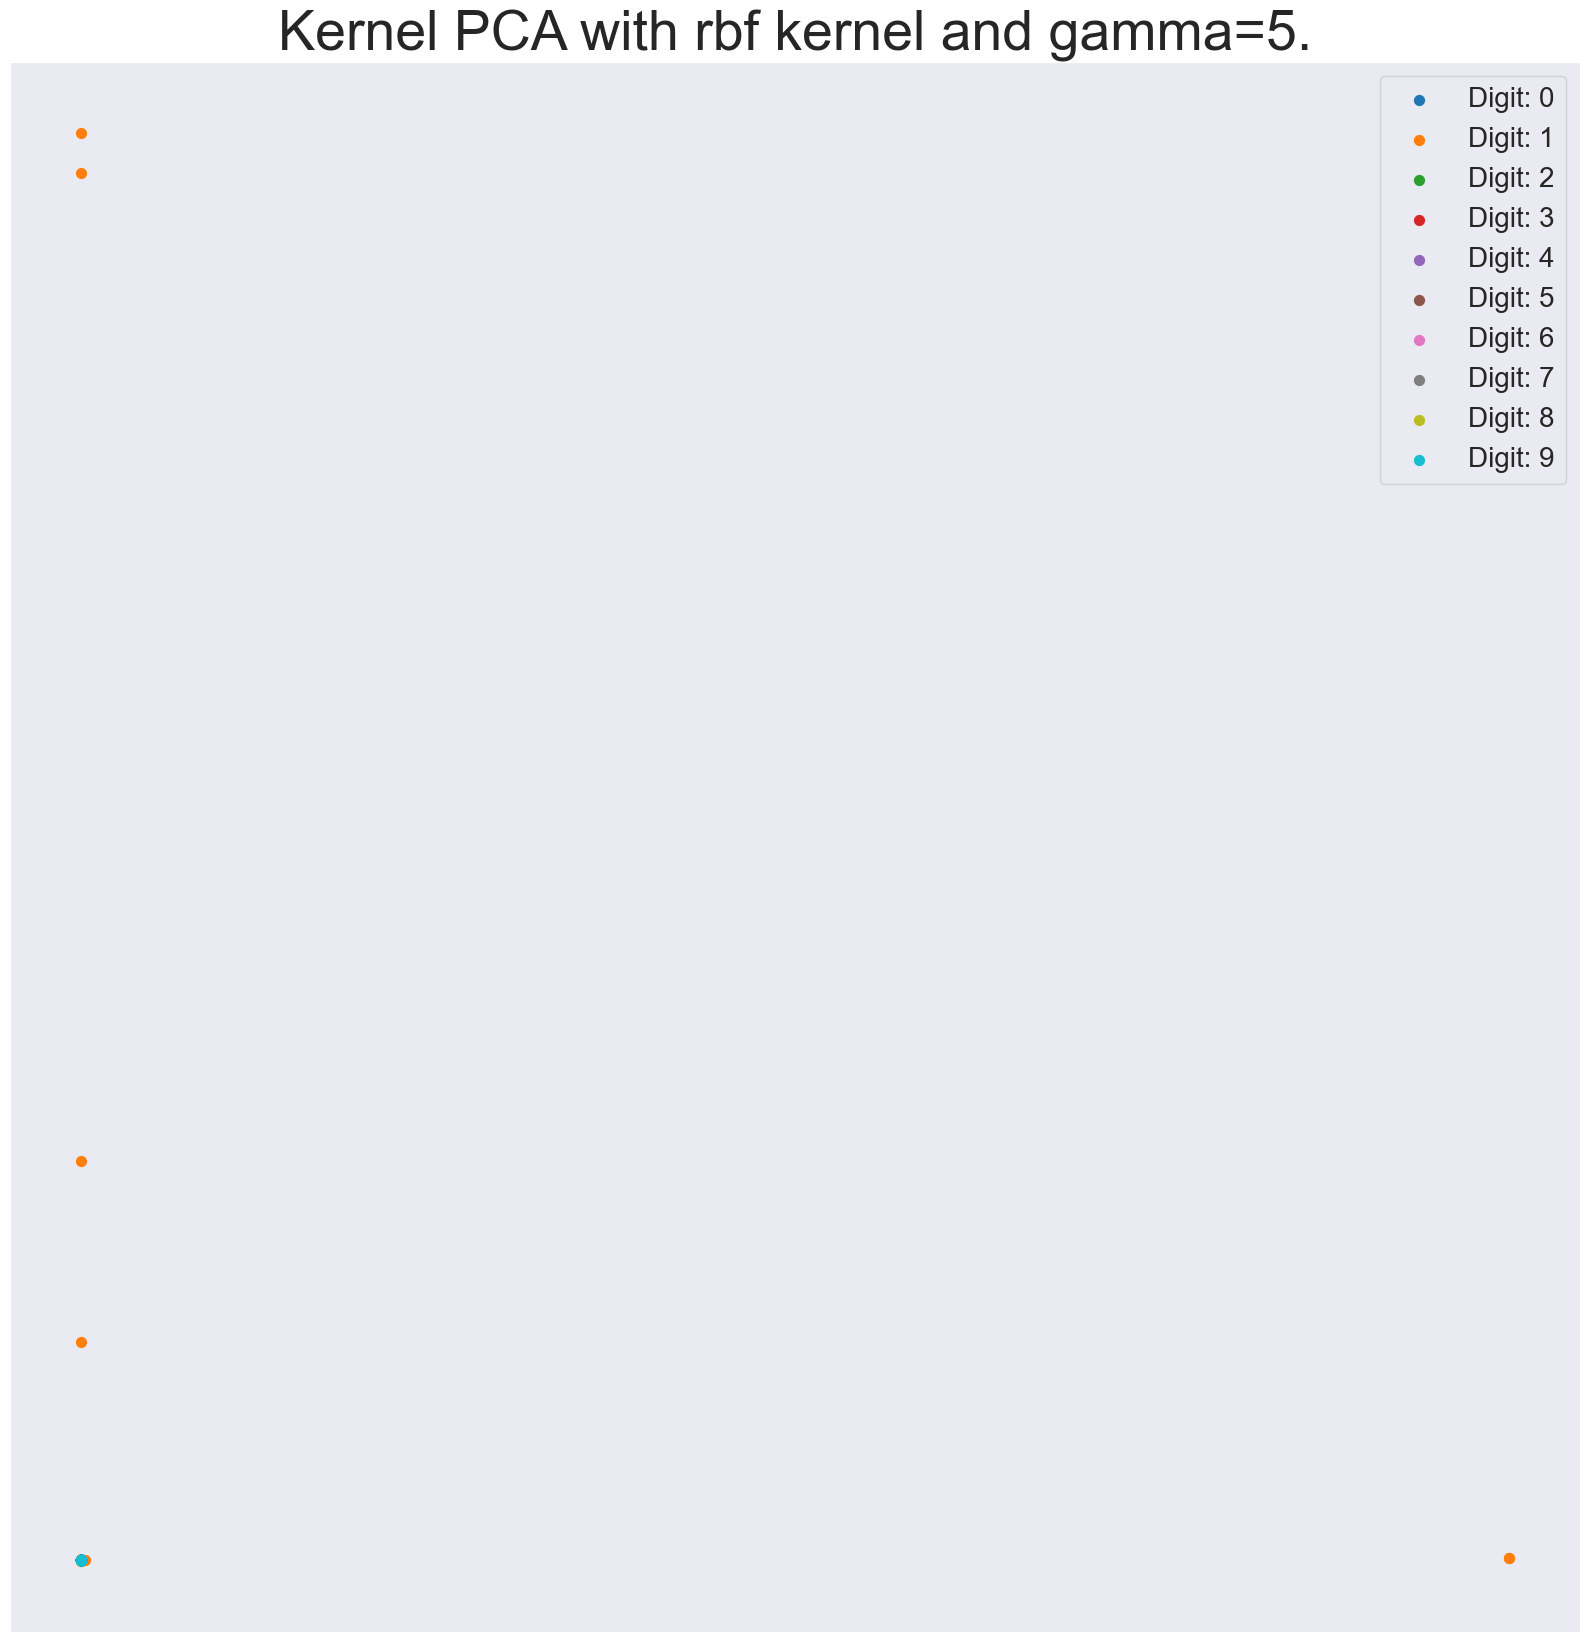

In [83]:
gamma_lst = [0.01,0.1,0.5,1,5]
for gamma in gamma_lst:
    kpca = KernelPCA(kernel ='rbf', gamma = gamma)
    X_pca_embedded = kpca.fit_transform(X_small)
    plot_2d_mnist_scatter(X_pca_embedded, y_small, title=f"Kernel PCA with rbf kernel and gamma={gamma}.")

Kernel PCA for gamma bigger than 0.1 was able to seperate properly label `1`, but lost information about rest of data

In [99]:
explained_variance_ratio_784 = calculate_explained_variance(X_small,784)


Explained Variance:
[5.17530266e+00 3.85741609e+00 3.34196671e+00 2.85158101e+00
 2.58732922e+00 2.32840207e+00 1.76082353e+00 1.51057355e+00
 1.48814594e+00 1.14467658e+00 1.07286438e+00 1.01178570e+00
 8.95005161e-01 8.39171636e-01 8.19294935e-01 7.70748195e-01
 6.55577682e-01 6.22594378e-01 6.21635027e-01 5.97052183e-01
 5.63956581e-01 5.07503292e-01 4.89621147e-01 4.67502956e-01
 4.56746669e-01 4.39350198e-01 4.02554921e-01 3.93292469e-01
 3.74439630e-01 3.56773754e-01 3.37199392e-01 3.17055347e-01
 3.08053365e-01 2.86673351e-01 2.82883452e-01 2.64438576e-01
 2.60864868e-01 2.56163329e-01 2.47639177e-01 2.38166215e-01
 2.23454412e-01 2.14802756e-01 2.05170302e-01 1.98740323e-01
 1.95450543e-01 1.87290490e-01 1.84744094e-01 1.76431042e-01
 1.74003672e-01 1.66907307e-01 1.61883053e-01 1.58007006e-01
 1.57484729e-01 1.51564906e-01 1.44558280e-01 1.41973915e-01
 1.36514627e-01 1.28683021e-01 1.23595035e-01 1.20726914e-01
 1.18711593e-01 1.16490982e-01 1.11884298e-01 1.11145711e-01
 1.0

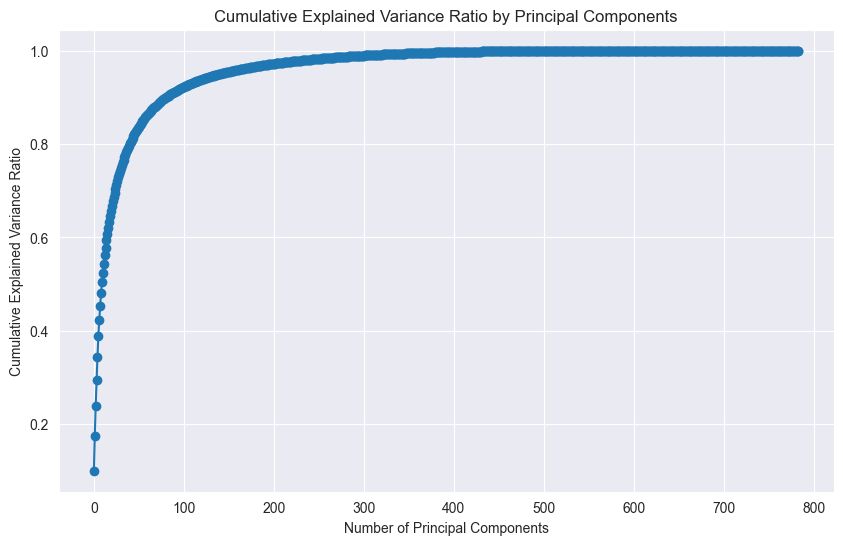

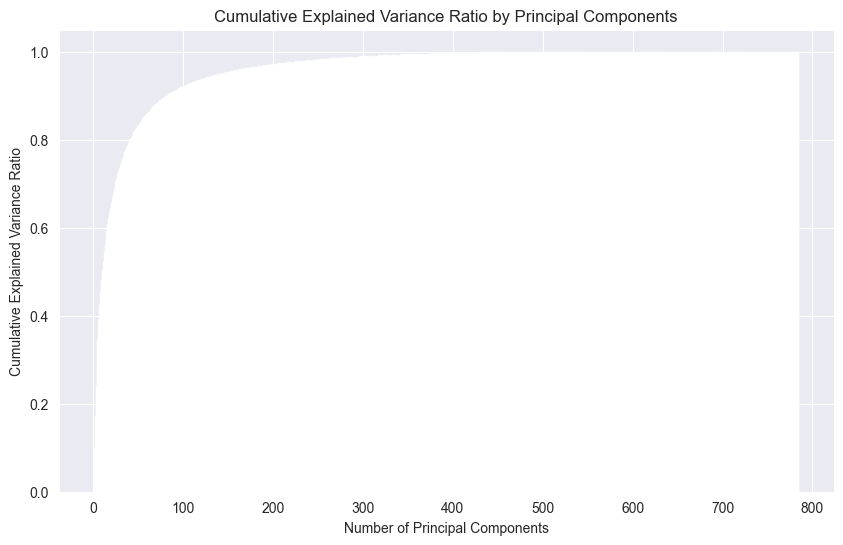

In [100]:
cumulative_variance_ratio_784 = plot_explained_variance(explained_variance_ratio_784)


In [109]:
percentage_99 = len([elem for elem in cumulative_variance_ratio_784 if elem <0.99])

percentage_95 = len([elem for elem in cumulative_variance_ratio_784 if elem <0.95])

percentage_90 = len([elem for elem in cumulative_variance_ratio_784 if elem <0.90])

percentage_85 = len([elem for elem in cumulative_variance_ratio_784 if elem <0.85])

In [111]:
percentage_99,percentage_95,percentage_90,percentage_85

(303, 140, 81, 55)

In [192]:
def visualize_mnist_comparison(X_original, X_transformed,y,title, indices = None,num_images=5, reshape=True, figsize=(15, 6)):

    if indices is None:
        indices = np.random.choice(len(X_original), num_images, replace=False)


    # Create figure with 2 rows
    fig, axes = plt.subplots(2, len(indices), figsize=figsize)
    fig.suptitle(title, fontsize=20, y=1.05)

    for i, idx in enumerate(indices):
        # Original image
        img = X_original[idx]

        # Reshape if necessary
        if reshape and img.shape[0] == 784:
            img = img.reshape(28, 28)

        # Display image
        axes[0][i].imshow(img, cmap='gray')
        axes[0][i].axis('off')

        axes[0][i].set_title(f'Original. Label: {y[idx]}', fontsize=12, pad=10)

        # Transformed image
        img_trans = X_transformed[idx]
        if reshape and img_trans.shape[0] == 784:
            img_trans = img_trans.reshape(28, 28)
        axes[1][i].imshow(img_trans, cmap='gray')
        axes[1][i].axis('off')

        axes[1][i].set_title(f'Transformed. Label: {y[idx]}', fontsize=12, pad=10)

    plt.tight_layout()

    plt.show()


In [326]:
pca = PCA(n_components=303)
X_pca_99_var = pca.fit_transform(X_small)
X_pca_99_var_inverse = pca.inverse_transform(X_pca_99_var)

pca = PCA(n_components=140)
X_pca_95_var = pca.fit_transform(X_small)
X_pca_95_var_inverse = pca.inverse_transform(X_pca_95_var)

pca = PCA(n_components=81)
X_pca_90_var = pca.fit_transform(X_small)
X_pca_90_var_inverse = pca.inverse_transform(X_pca_90_var)

pca = PCA(n_components=55)
X_pca_85_var = pca.fit_transform(X_small)
X_pca_85_var_inverse = pca.inverse_transform(X_pca_85_var)

In [ ]:
indices = np.random.choice(len(X_small), 5, replace=False)

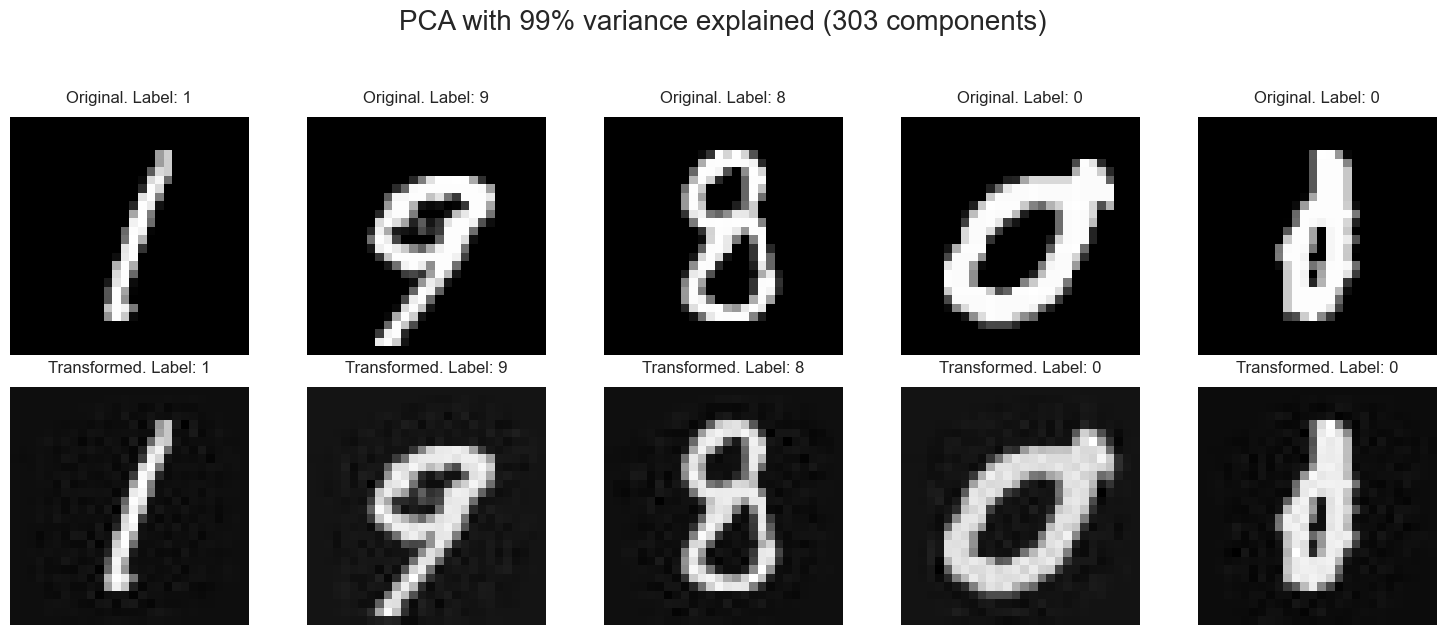

In [327]:
visualize_mnist_comparison(X_small, X_pca_99_var_inverse,y=y_small,indices=indices, title="PCA with 99% variance explained (303 components)")

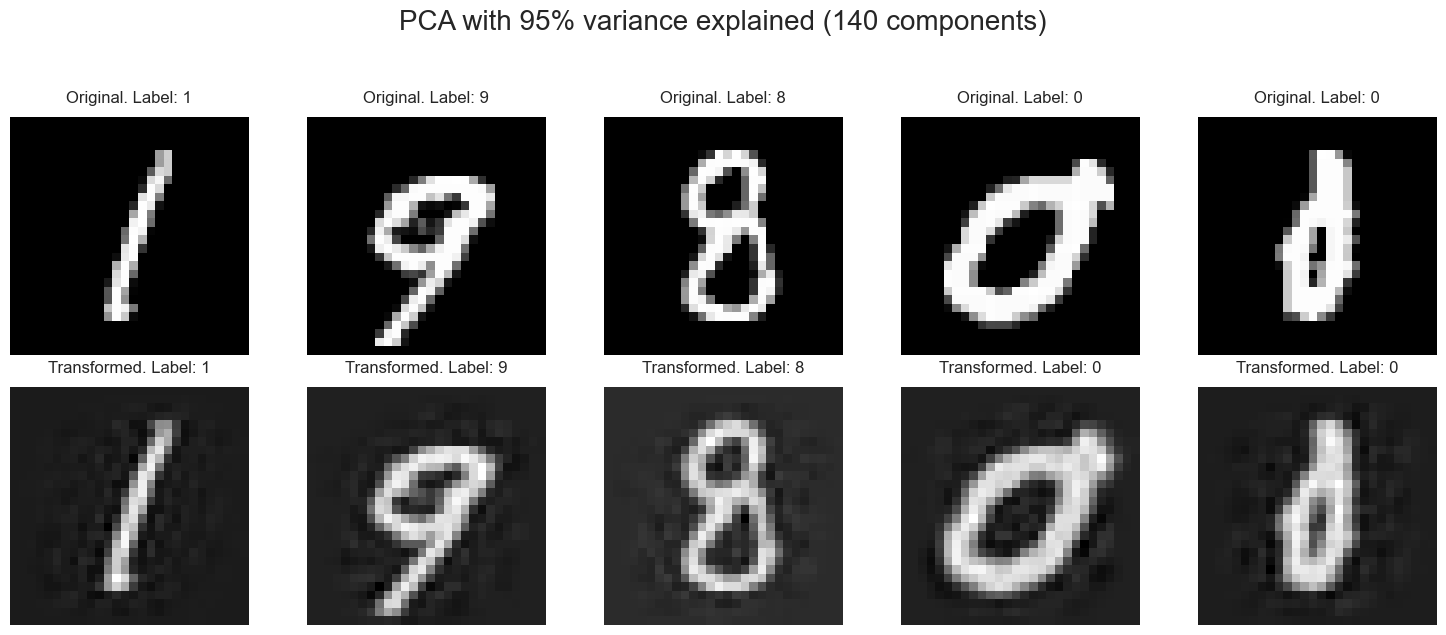

In [328]:
visualize_mnist_comparison(X_small, X_pca_95_var_inverse,y=y_small,indices=indices, title="PCA with 95% variance explained (140 components)")

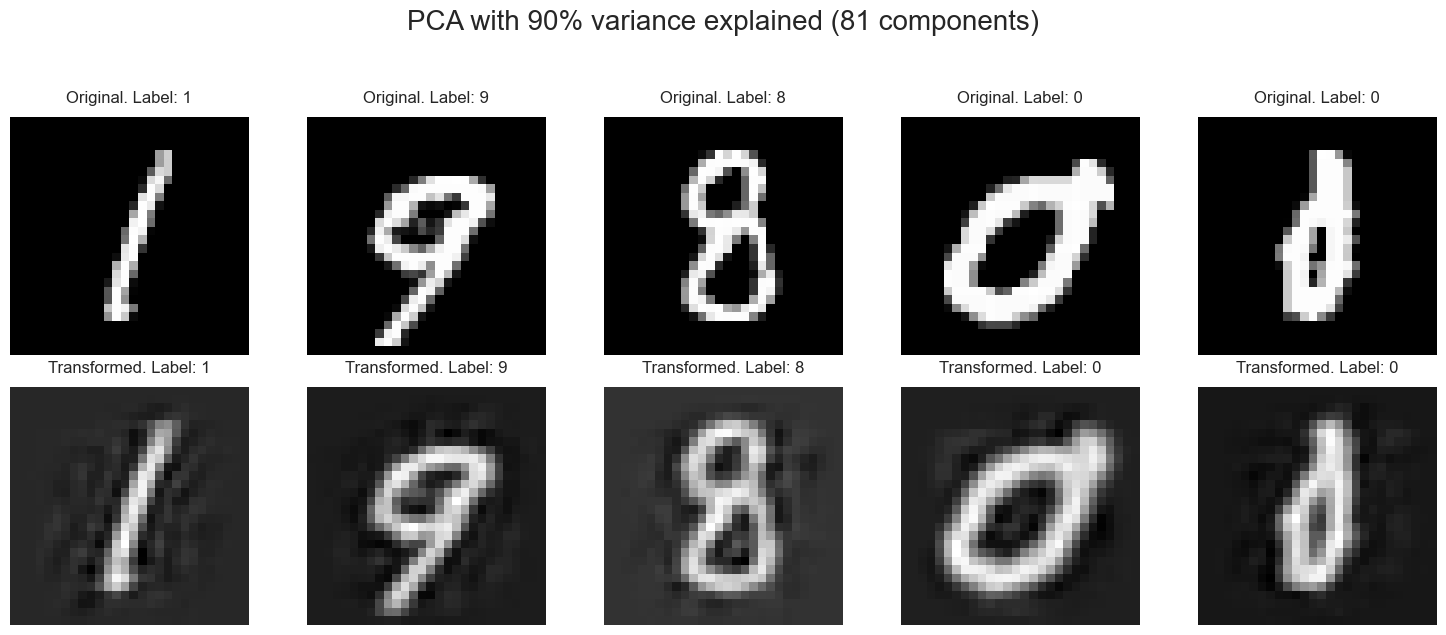

In [329]:
visualize_mnist_comparison(X_small, X_pca_90_var_inverse,y=y_small,indices=indices, title="PCA with 90% variance explained (81 components)")

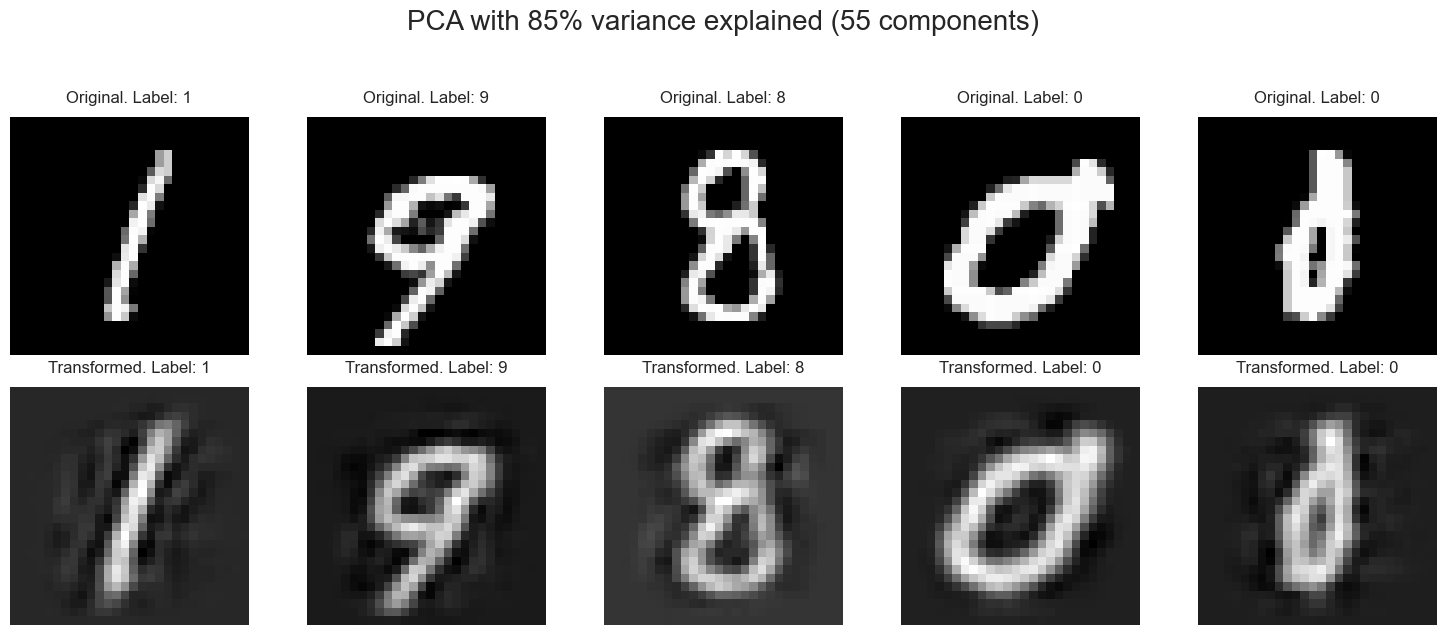

In [330]:
visualize_mnist_comparison(X_small, X_pca_85_var_inverse,y=y_small,indices=indices, title="PCA with 85% variance explained (55 components)")

In [331]:
gamma=0.01
kpca = KernelPCA(n_components=303, kernel ='rbf', gamma = gamma, fit_inverse_transform=True)
X_pca_99_var = kpca.fit_transform(X_small)
X_pca_99_var_inverse = kpca.inverse_transform(X_pca_99_var)

kpca = KernelPCA(n_components=140, kernel ='rbf', gamma = gamma,  fit_inverse_transform=True)
X_pca_95_var = kpca.fit_transform(X_small)
X_pca_95_var_inverse = kpca.inverse_transform(X_pca_95_var)

kpca = KernelPCA(n_components=81, kernel ='rbf', gamma = gamma,  fit_inverse_transform=True)
X_pca_90_var = kpca.fit_transform(X_small)
X_pca_90_var_inverse = kpca.inverse_transform(X_pca_90_var)

kpca = KernelPCA(n_components=2, kernel ='rbf', gamma = gamma,  fit_inverse_transform=True)
X_pca_85_var = kpca.fit_transform(X_small)
X_pca_85_var_inverse = kpca.inverse_transform(X_pca_85_var)

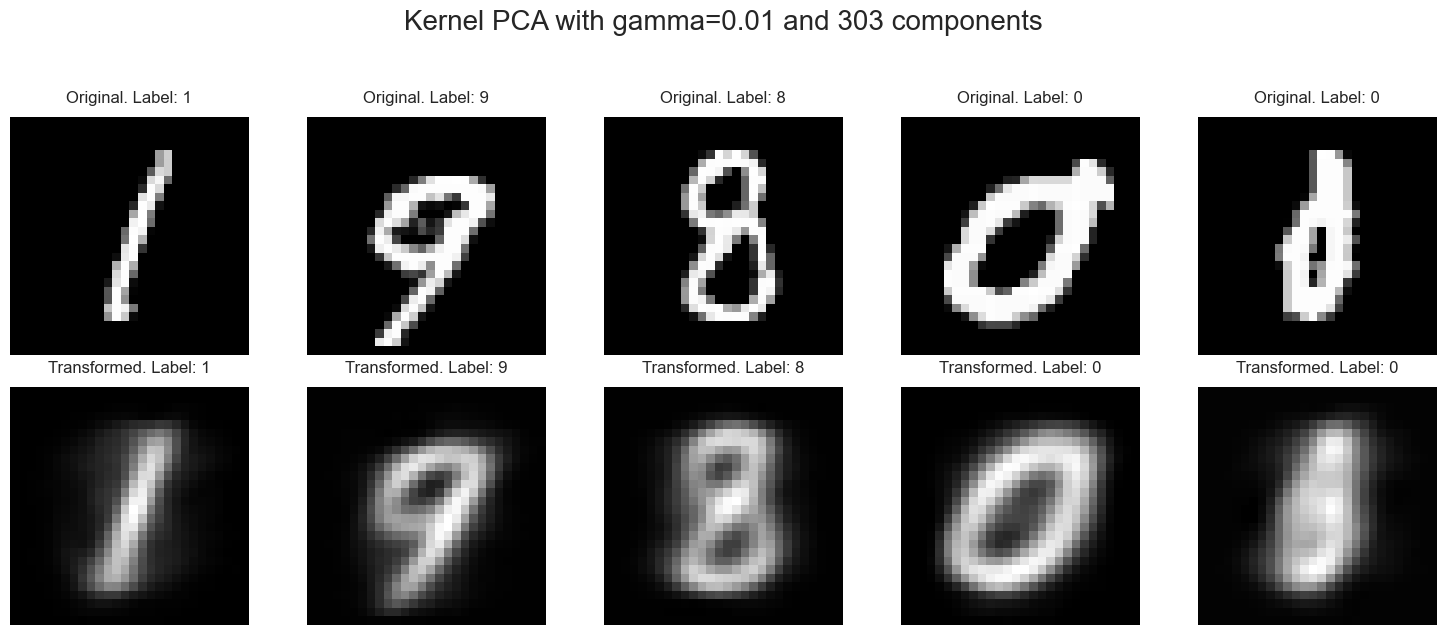

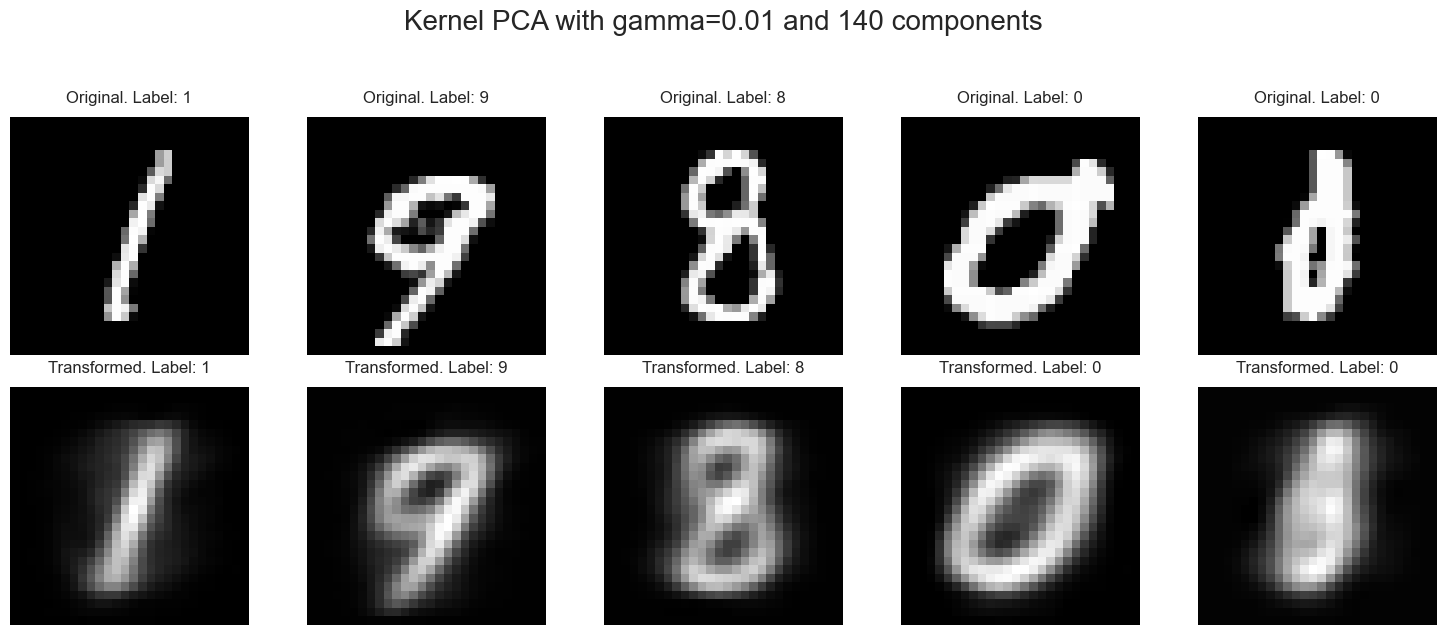

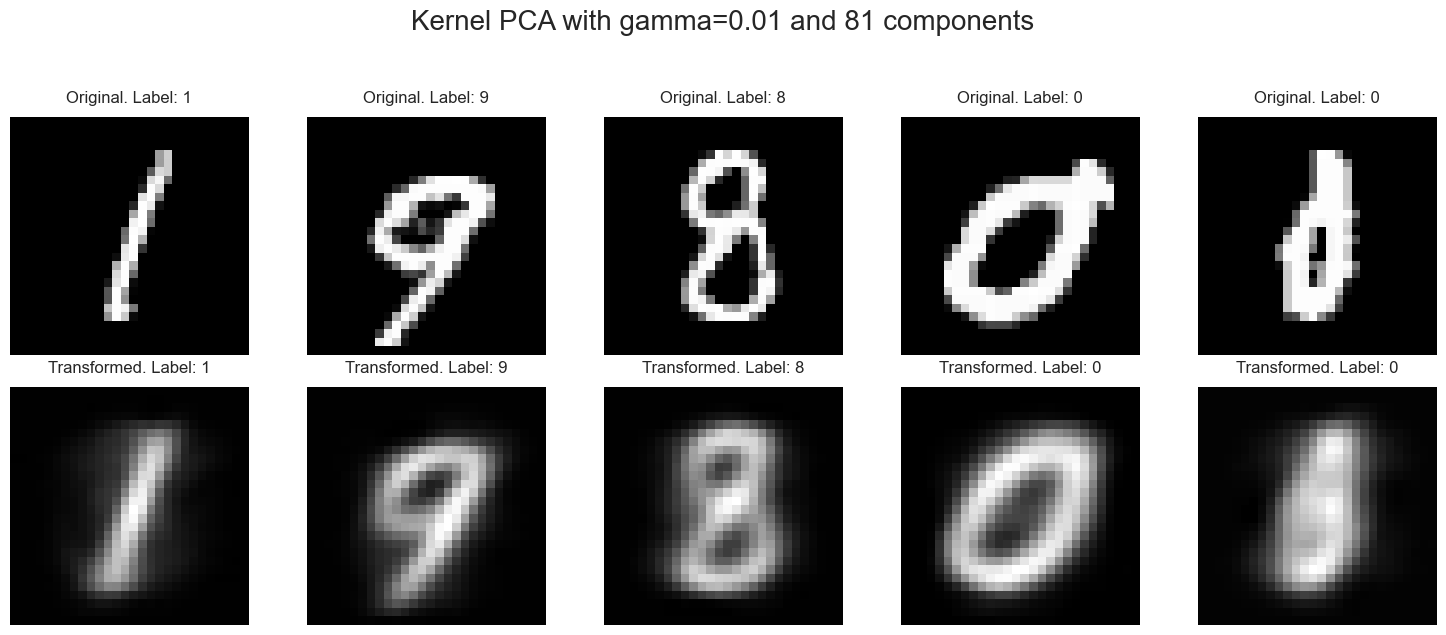

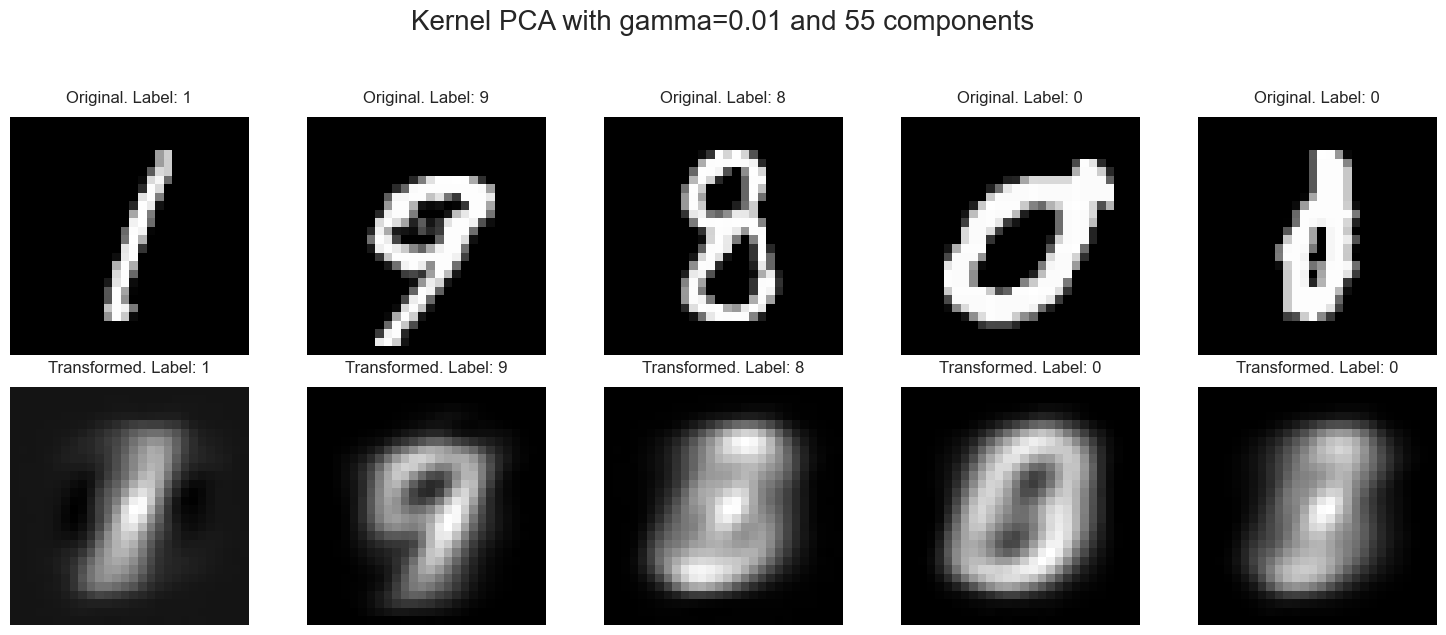

In [332]:
visualize_mnist_comparison(X_small, X_pca_99_var_inverse,y=y_small,indices=indices, title=f"Kernel PCA with {gamma=} and 303 components")
visualize_mnist_comparison(X_small, X_pca_95_var_inverse,y=y_small,indices=indices, title=f"Kernel PCA with {gamma=} and 140 components")
visualize_mnist_comparison(X_small, X_pca_90_var_inverse,y=y_small,indices=indices, title=f"Kernel PCA with {gamma=} and 81 components")
visualize_mnist_comparison(X_small, X_pca_85_var_inverse,y=y_small,indices=indices, title=f"Kernel PCA with {gamma=} and 55 components")




In [335]:
gamma=2
kpca = KernelPCA(n_components=303, kernel ='rbf', gamma = gamma, fit_inverse_transform=True)
X_pca_99_var = kpca.fit_transform(X_small)
X_pca_99_var_inverse = kpca.inverse_transform(X_pca_99_var)

kpca = KernelPCA(n_components=140, kernel ='rbf', gamma = gamma,  fit_inverse_transform=True)
X_pca_95_var = kpca.fit_transform(X_small)
X_pca_95_var_inverse = kpca.inverse_transform(X_pca_95_var)

kpca = KernelPCA(n_components=81, kernel ='rbf', gamma = gamma,  fit_inverse_transform=True)
X_pca_90_var = kpca.fit_transform(X_small)
X_pca_90_var_inverse = kpca.inverse_transform(X_pca_90_var)

kpca = KernelPCA(n_components=2, kernel ='rbf', gamma = gamma,  fit_inverse_transform=True)
X_pca_85_var = kpca.fit_transform(X_small)
X_pca_85_var_inverse = kpca.inverse_transform(X_pca_85_var)

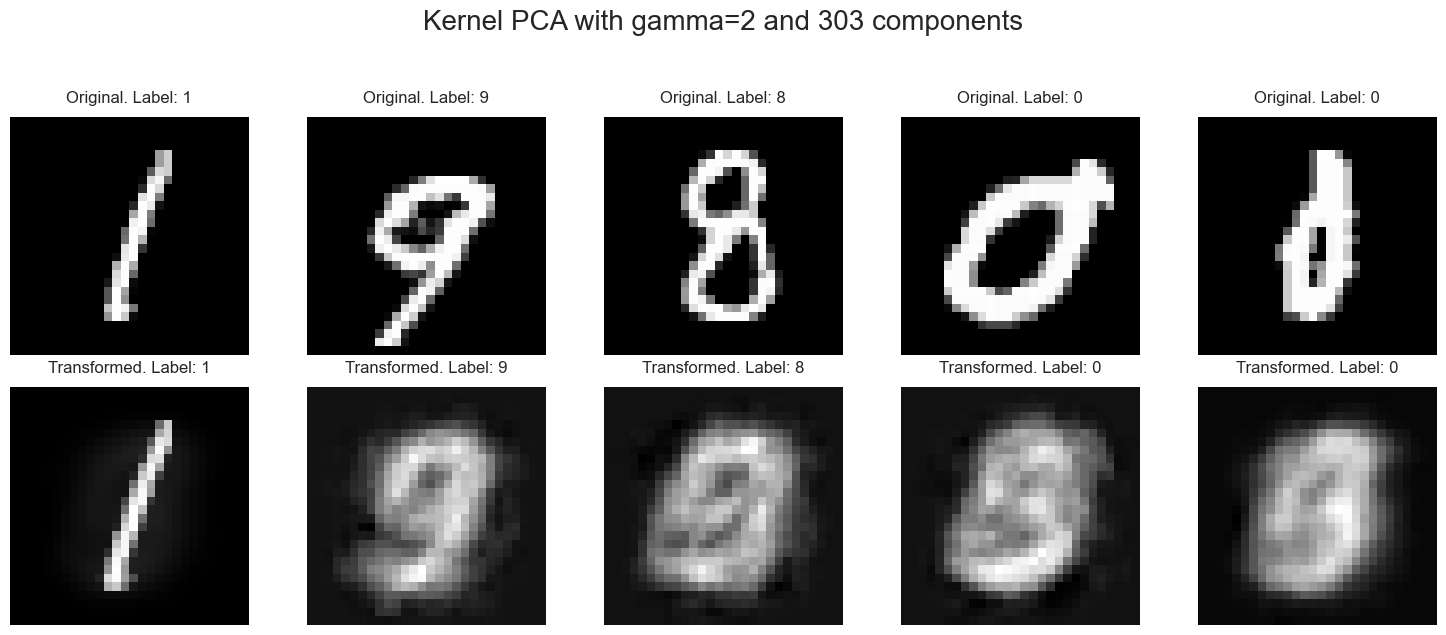

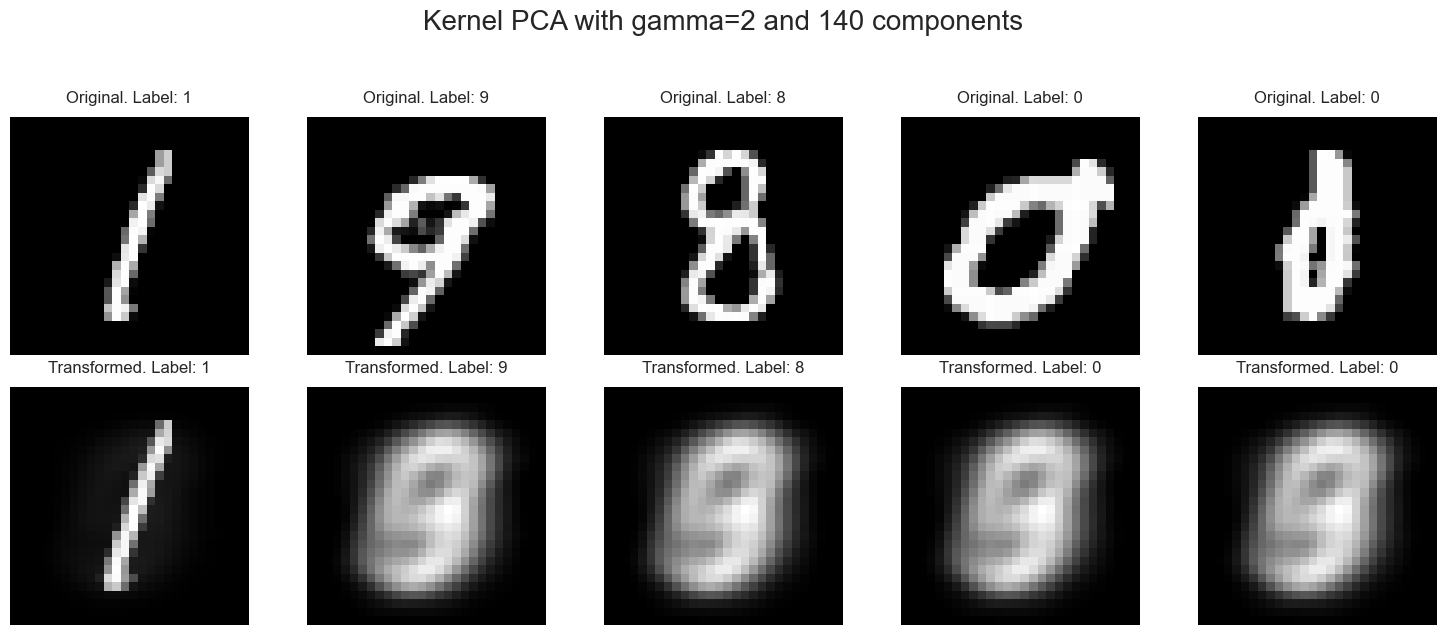

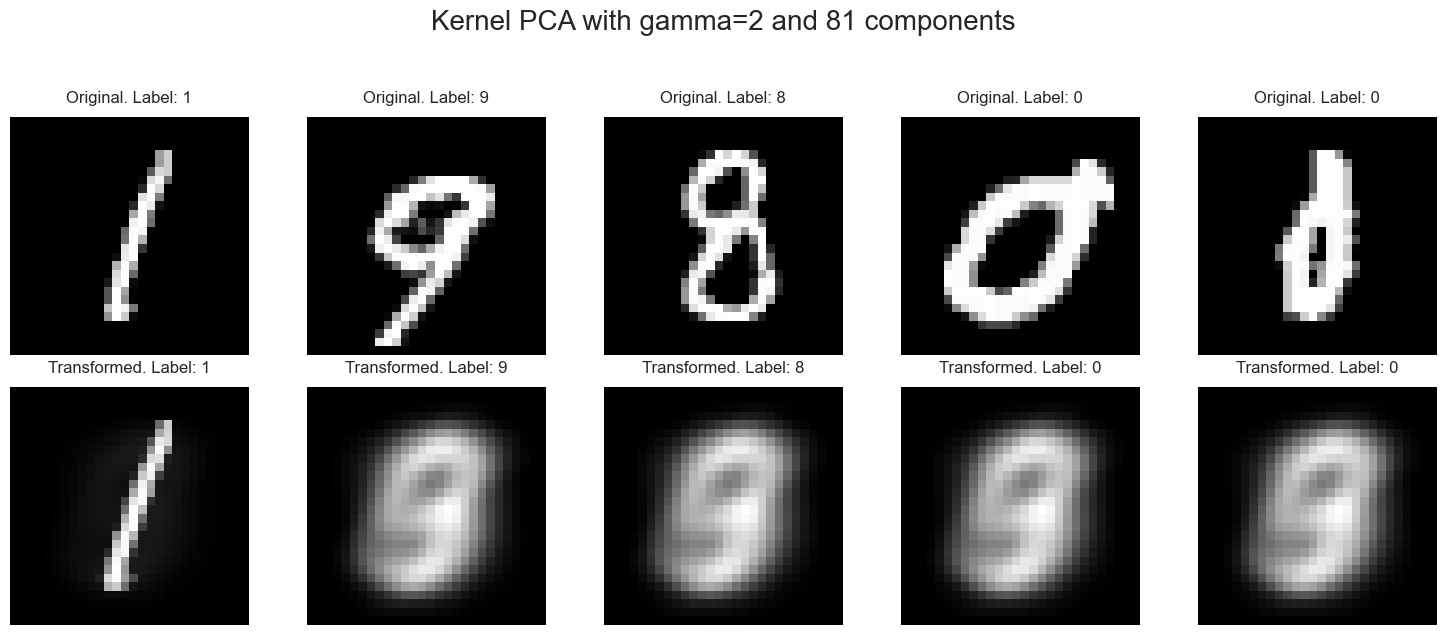

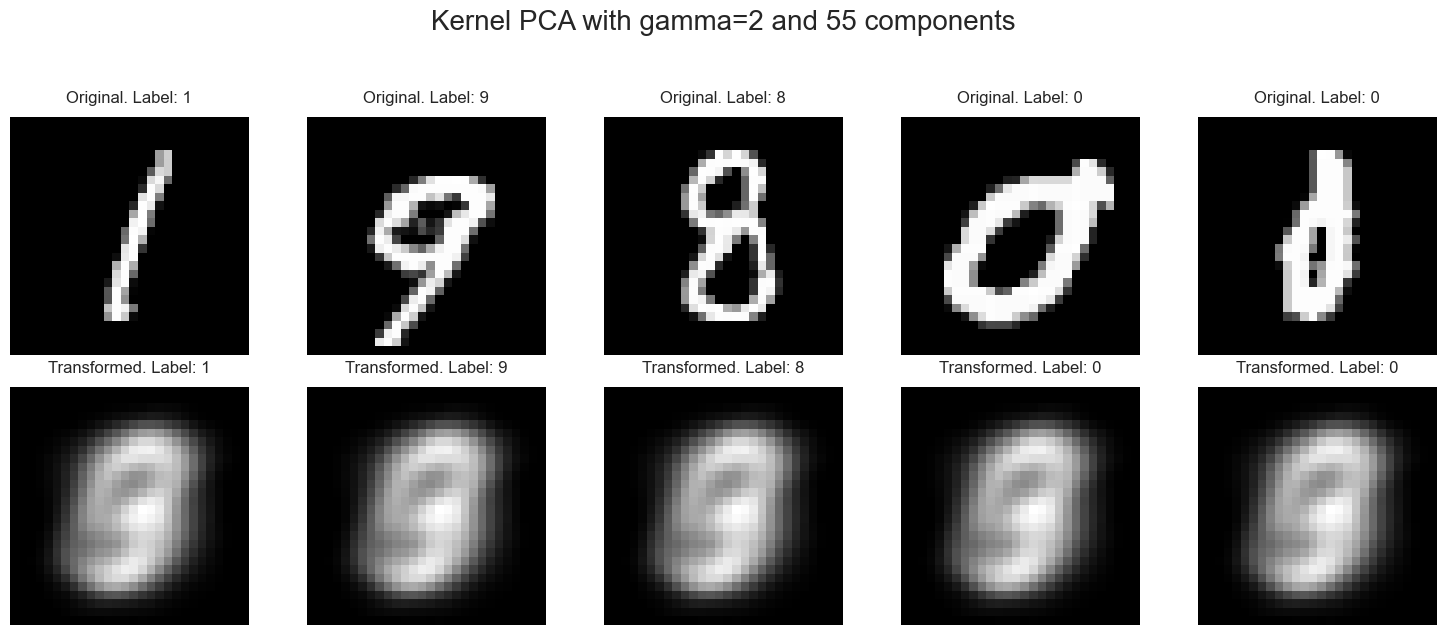

In [336]:
visualize_mnist_comparison(X_small, X_pca_99_var_inverse,y=y_small,indices=indices, title=f"Kernel PCA with {gamma=} and 303 components")
visualize_mnist_comparison(X_small, X_pca_95_var_inverse,y=y_small,indices=indices, title=f"Kernel PCA with {gamma=} and 140 components")
visualize_mnist_comparison(X_small, X_pca_90_var_inverse,y=y_small,indices=indices, title=f"Kernel PCA with {gamma=} and 81 components")
visualize_mnist_comparison(X_small, X_pca_85_var_inverse,y=y_small,indices=indices, title=f"Kernel PCA with {gamma=} and 55 components")


Comparing image reconstruction using PCA and KPCA, I reached the following conclusions:

- PCA seems to reconstruct images better than KPCA.
- For KPCA with gamma=2, using 303, 140, and 91 components, it was able to reconstruct label 1 with great precision, making it difficult to distinguish between the original and the reconstructed image. However, when the number of components was reduced to 55, it failed to reconstruct properly. The issue with gamma=2 is that it works well only for label 1. That behaviour could be predicted from the plot, where I showed Kernel PCA scores on all labels. We can observe that it clearly separate label `1`, but lost information about the rest.
- With gamma=0.1, the reconstruction of label 1 was not as good as with gamma=2, but it performed much better for the other labels. On average, it provided better overall reconstruction quality.

During the laboratory, I explored several variants of PCA. Starting with classic linear PCA, the strength of this method is its lower computational complexity compared to Kernel PCA. Additionally, as a linear method, it allows us to calculate the explained variance and determine how much of the data is represented by a given number of components.

The weakness of PCA is that it struggles with nonlinear data, such as the simple moons dataset. In such cases, Kernel PCA (KPCA) with the RBF kernel performed better. KPCA extends PCA by using kernel functions, such as the Radial Basis Function (RBF) kernel, to map the data into a higher-dimensional space where linear separation becomes possible. This enables KPCA to effectively capture complex, nonlinear relationships in the data.

Such methods can be useful in real-world scenarios, for example, when training a model and wanting to reduce the size of the input data without losing its relevance, or when performing image compression, as we did with the MNIST dataset.

Regarding computational complexity, even for a small portion of the MNIST dataset (10,000 examples), Kernel PCA with the RBF kernel took approximately 10 times longer than basic PCA. Therefore, for large-scale datasets (millions of samples or more), it can be computationally expensive.

Potential improvements to these methods include using approximations of kernel methods to reduce computational complexity or employing a hybrid approach, where we first select important features using PCA and then apply KPCA to them.